# Taller 1: Multi Armed Bandits (MAB)

Diego Fernando Osorio Diaz *df.osorio11@uniandes.edu.co* 20153517

Emmanuel González González *e.gonzalezg@uniandes.edu.co* 201614679


# Introducción

El presente informe desarrolla la solución del problema de n-bandits a partir de un archivo compilado .envs que contiene 3 diferentes escenarios/ambientes que son estacionario con alta varianza, estacionario con baja varianza y no estacionario. Debido a la naturaleza del problema no se conoce de antemano cuál es cada escenario. La interacción con los n-bandits se da mediante la clase BanditEnvs del archivo .envs que contiene la distribución de cada una de las acciones para los 3 escenarios.

El objetivo del problema es encontrar la solución óptima que maximiza las métricas de evaluación: recompensa promedio, % acción óptima, regret, recompensa esperada, entre otros. Para esto se desarrollaron los principales métodos de valor de acción (Action-value methods) para resolver el problema de los n-bandits: método e-greedy, método UBC.max (Selección con intervalo de confianza superior) y Gradient Bandit.


La solución del problema consistió en determinar la acción óptima de cada escenario/ambiente dispuesto, así como también escoger el método/algoritmo con mejor desempeño escogido para converger a la solución, indagando sobre la recompensa promedio ponderada para escoger en cada uno de los escenarios.

Para este taller se programó cada una de los algoritmos a explorar como una función, la cual retorna la recompensa de cada iteración, la acción escogida y la recompensa esperada de cada acción posible, entre otros vector y estados que retornan los algoritmos.

Para cada uno de los escenarios, se realizó la sintonización de los mejores hiperparámetros como eps (probabilidad de acción aleatoria e-greedy), c(balance entre valor estimado e incertidumbre) y alpha para maximizar el desempeño de los algoritmos, para luego comparar y contrastar los 3 métodos de acción de valor para cada escenario.

Para todos los escenarios los parámetros del ambiente son los bandits siempre con 10 posibles acciones (k=10) y se procedió a realizar los ensayos de estos algoritmos para cada uno de los escenarios repitiendo el experimento 2000 veces con 1000 iteraciones (time-step)por experimento, para enseguida ponderar las métricas de evaluación.


Los principales resultados obtenidos para cada escenario se detallan a continuación. Para el escenario 1 los mejores hiperparámetros fueron $eps=0.05, c_1=3, α=0.1$ . La acción óptima obtenida en el escenario 1 es 3. El mejor método de solución es UBC.max (Selección con intervalo de confianza superior).El escenario 1 corresponde al ambiente estacionario de alta varianza, con base a los resultados de las gráficas más ruidosa y menos suave de la recompensa promedio y el regret, debido a que el parámetro de la varianza de la distribución es mayor.

Para el escenario 2 los mejores hiperparámetros fueron $eps=0.05, c_2=1, α=0.1$ . La acción óptima obtenida en el escenario 1 es 3. El mejor método de solución es UBC.max (Selección con intervalo de confianza superior).El escenario 2 corresponde al ambiente estacionario de baja varianza, con base a los resultados de las gráficas más  suave y uniforme de la recompensa promedio y el regret, debido a que el parámetro de la varianza de la distribución es menor.


Finalmente para el escenario 3 los mejores hiperparámetros fueron $eps=0.05, c_1=2, α=0.1$ . La acción óptima obtenida en el escenario 1 es 3, obtenida principalmente a partir de las gráficas de recompensa esperada en la sintonización de los hiperparámetros del escenario, por lo que en este caso el número de veces que los diferentes métodos escogieron diferentes acciones es más variante y no es estacionario, debido a que las distribuciones de probabilidades de las acciones cambian con el tiempo. 
Del mismo modo, para el escenario 3 los resultados del regret (medida de pérdida relativa en relación con la acción óptima) se observa que después de 500 iteraciones se obtiene un regret negativo $regret<0 $ lo cual demuestra que debido a la naturaleza no estacionaria y variante en las distribuciones de los bandits durante la convergencia la acción óptima cambió, debido a que las distribuciones y la recompensa obtenida para diferentes variaciones cambia. Este fenómeno no se presenta para los escenarios estacionarios 1 y 2.


Si se conociece de antemano de un escenario no estacionario en el contexto de n-bandits, habría que dar más peso a las recompensas recientes en relación con las pasadas debido al constante cambio en los parámetros de las distribuciones. El mejor método de solución es Gradient Bandit. 

En las secciones posteriores se desarrolla el informe en detalle


In [ ]:
# Se importa la clase BanditEnvs del archivo envs.pyc
from envs import BanditEnvs

# Se importan otras librerias utiles
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from statistics import *

from IPython.display import clear_output
bandit_envs = BanditEnvs(k=10)

import warnings
warnings.filterwarnings('ignore')
 



---



# Desarrollo de Algoritmos

## Programación algoritmo ε-Greedy




El algoritmo e-greedy (Near Greedy) es un método que escoge la acción "greedy" o de mayor retorno (recompensa promedio) en la mayoría de las acciones ejecutadas y cada cierto número de iteraciones escoge una acción aleatoria dentro de los n-bandits. Para implementar este algoritmo por cada iteración se escoge un número al azar entre 0-1 que determina una probabilidad aleatoria de selección. 

El hiperparámetro $eps$ determina el umbral de probabilidad con el que se seleccionan las acciones. Se tienen 2 casos: cuando la probabilidad aleatoria es menor al umbral $eps$ entonces se escoge una acción aleatoria dentro del vector de n-bandits del problema, cuando la probabilidad aleatoria es mayor al umbral $eps$ entonces se escoge la acción e-greedy que es la acción de máximo retorno hasta la iteración actual.

La selección con baja probabilidad de una acción aleatoria dentro de  las acciones de n-bandit asegura exploración dentro del algoritmo, a pesar de que el mayor porcentaje de acciones optan por la explotación del conocimiento del retorno para maximizar recompensa.

Una vez escogida la acción (aleatoria o e-greedy), el algoritmo ejecuta esta acción, obteniendo así un vector de recompensa en la iteración, el cual a su vez actualiza el vector de rectorno que es el promedio de recompensa para cada acción hasta la iteración actual, el cual se realiza de manera incremental. Finalmente los vectores de recompensa, retorno acción seleccionada y número de veces que se selecciona cada acción es actualizado. Lo anterior se repite para n-iteraciones. 


Los parámetros del algoritmo son el vector de acciones de n-bandits(band) $actions$, el número de iteraciones (ite) $n$, el umbral de probabilidad de la acción aleatoria para explorar $eps$, el valor de inicialización óptimista $v0$ el cuál se seleccionó en 5 basándose en los autores Sutton y Barto[1] para el método de acción de valor e-greedy, y finalmente el ambiente/escenario $env$.




In [ ]:
def e_greedy (ep,band,ite):
  band.reset()
  recompensaA = []
  for i in range(10):
    recompensaA.append(0)
  recompensaT = []
  a_selec = []
  ai=random.randint(0,9)
  a_selec.append(ai)
  r=band.run_env_3(ai)
  recompensaT.append(r)
  recompensaA[ai]=r
  for i in range (1,ite):
    x=random.random()
    if x<=ep:
      ai=random.randint(0,9)
      a_selec.append(ai)
      r=band.run_env_3(ai)
      recompensaT.append(r)
      recompensaA[ai]=recompensaA[ai]+(r-recompensaA[ai])/a_selec.count(ai)
    else:
      ai= recompensaA.index(np.max(recompensaA))
      a_selec.append(ai)
      r=band.run_env_3(ai)
      recompensaT.append(r)
      recompensaA[ai]=recompensaA[ai]+(r-recompensaA[ai])/a_selec.count(ai)

  return recompensaA,recompensaT,a_selec

In [ ]:
# def: obtiene la accion e-greedy(near-greedy) que maximiza retorno a partir de una lista de acciones (n-bandits), n time-step, eps umbral a.aleatoria, v0 valor inicializacion optimista del retorno, env ambiente/escenario
# params: actions=lista de acciones(n-bandits[0-19]), n=time-step, eps=probabilidad e-greedy (threshold), v0= valor inicializacion optimista, env=ambiente de RL

# return: recompensa_list=lista de recompensa de acciones seleccionadas,retornos_list=lista de retorno,action_selected=lista de acciones seleccionadas,n_select_list= n.veces seleccionada cada accion
def metodo_e_greedy(actions,n,eps,v0,env):

    # listas que actualiza el algoritmo
    retornos_list = [] # lista de retorno de las acciones ( incremental)

    n_select_list = [] # lista de n.veces seleccionada cada accion

    # listas de valores que agrega el algoritmo 
    recompensa_list = [] # lista de recompensas

    action_selected = [] # lista de acciones seleccionadas

    # inicializar lista de retornos iniciales con inicializacion optimista
    retornos_list = [v0 for i in range(actions.shape[0])] 
    # inicializar lista de n.veces seleccionada cada accion en 0 para todas las acciones
    n_select_list = np.zeros(10)

    # itera sobre n time-steps 
    for i in range(0,n):
    
            rand_float = np.random.rand() # probabilidad aleatoria entre 0-1
            accion_e_greedy = -1 # accion e-greedy escogida
    
            # escoger accion
            # caso aleatorio(incluida accion greedy): probabilidad aleatoria es menor al umbral/threshold
            if rand_float < eps :
                accion_e_greedy=np.random.choice(actions,replace=True,p=None)
                #print("La accion e-greedy escogida: ")
                #print(accion_e_greedy)
        
            # caso greedy: escoger accion con retorno maximo
            else:
                accion_e_greedy = actions[retornos_list.index(max(retornos_list))]
                #print("La accion e-greedy escogida: ")
                #print(accion_e_greedy)
    
            # recompensa actual al escoger accion e-greedy depende del ambiente (env) escogido
            if env==1: 
                recompensa_actual = bandit_envs.run_env_1(accion_e_greedy)
                #print("La recompensa actual: "+str(recompensa_actual))
            elif env==2:
                recompensa_actual = bandit_envs.run_env_2(accion_e_greedy)
                #print("La recompensa actual: "+str(recompensa_actual))
            elif env==3:
                recompensa_actual = bandit_envs.run_env_3(accion_e_greedy)
                #print("La recompensa actual: "+str(recompensa_actual))
                
            # actualizar n.veces escogida de accion escogida
            n_select_list[accion_e_greedy] +=1
    
            # actualizar retorno de accion escogida (retorno eficiente)
            retornos_list[accion_e_greedy] = retornos_list[accion_e_greedy] + (1/(n_select_list[accion_e_greedy]))*(recompensa_actual-retornos_list[accion_e_greedy])     
    
            # agregar recompensa actual a lista de recompensas
            recompensa_list.append(recompensa_actual)
    
            # agregar accion actual a lista de acciones seleccionadas
            action_selected.append(accion_e_greedy)
            #print("")
            

    #print("Lista de acciones seleccionadas: "+ str(action_selected) )
    #print("")
    #print("Lista de recompensas: "+ str(recompensa_list) )
    #print("Tamaño lista de recompensas: "+str(len(recompensa_list)))
    #print("")
    #print("Lista de retornos actual: " + str(retornos_list) )
    #print("Tamaño lista de retornos actual: "+str(len(retornos_list)))
    #print("")
    #print("Lista de n.veces escogida de cada accion: "+str(n_select_list) )
    
    return recompensa_list,retornos_list,action_selected,n_select_list


bandit_envs.reset()   


# parametros de algoritmo E-greedy
actions = np.arange(0,10,1) # lista de acciones en bandits
n = 1000 # time-step
eps=0.1 # umbral/threshold
v0=5 # valor inicializacion optimista
env=2 # ambiente/escenario de RL
metodo_e_greedy(actions,n,eps,v0,env)

([0.9850546364183956,
  0.610364853250955,
  0.5714709997729124,
  4.737388653919123,
  1.0065819085370478,
  4.278890423508236,
  2.3430412915067205,
  1.002190640089601,
  -2.3052801225944304,
  -1.798495294806091,
  1.8481761860091581,
  2.8435199093108032,
  2.4679951702727716,
  3.1876148160462905,
  3.352445489799058,
  3.9666763957211613,
  -0.19170877449521573,
  3.3308496591957395,
  3.5517508244655094,
  4.863326021667821,
  1.3191145756083342,
  3.4810450465111282,
  4.655782130727397,
  3.5111076601437916,
  3.1157323483066617,
  2.421129323144213,
  4.018766735244485,
  3.6552888801612076,
  5.244988990230194,
  3.567874190389612,
  4.409668445342394,
  4.037578488950764,
  4.167597978847941,
  3.0634206055024733,
  3.0740590339928553,
  3.5680264311264236,
  3.542457307655921,
  2.8785591448683343,
  4.429640436905649,
  3.1164941632858536,
  2.2724015160687143,
  4.053609097570778,
  3.431331657198029,
  4.793262735888882,
  3.141888872447027,
  2.77003587260075,
  4.128

## Programación algoritmo Upper Confidence Bound (UCB)




El Algoritmo UBC.max Upper Confidence Bound (Selección con intervalo de confianza) selecciona las acciones a partir del vector de estimativos de valor. Este método pondera el retorno actual de la acción con el número de veces que ha sido seleccionado, a partir del hiperparámetro $c$ que determina el balance entre estimativos de valor e incertidumbre. El objetivo del algortimo es seleccionar las acciones con incertidumbre que tienden a tener el mayor retorno, y que debido a esta incertidumbre en un estado de tiempo n podrían superar la acción con mayor retorno actual. 

Para esto el algoritmo inicializa el vector de estimativos de valor en 0. 
En  cada iteración se elige la acción con el mayor estimado de valor actual con base a la siguiente ecuación:

$A_t=max_a[Q_t(a)+c*sqrt(ln(t)/N_t(a))$

Finalmente el algoritmo actualiza los vectores de retorno actual de manera incremental, y el vector de estimados de valor, para $n$ iteraciones.

Los parámetros del algoritmo son el vector de acciones de n-bandits(band) $actions$, el número de iteraciones (ite) $n$, el balance entre los estimativos de valor y la incertidumbre de las distribuciones $c$, el valor inicial de retorno $v0=0$, y finalmente el ambiente/escenario $env$ entre otros.

In [ ]:
#codigo bien perron
def UCBmax (c,band,it):
  band.reset()
  recompensaA= []
  recompensaM=[] 
  contA=[]
  r=0
  rt=[]
  a_selec = []
  for i in range(10):
    recompensaA.append(0)
    recompensaM.append(0)
    contA.append(0)
    
  for i in range(10):
    r=band.run_env_3(i)
    rt.append(r)
    a_selec.append(i)
    contA[i]+=1
    recompensaA[i]=recompensaA[i]+(r-recompensaA[i])/contA[i]
    recompensaM[i]=recompensaA[i]+c*np.sqrt(np.log(i+1)/contA[i])
  for i in range (10,it):
    sele=recompensaM.index(np.max(recompensaM))
    a_selec.append(sele)
    r=band.run_env_3(sele)
    rt.append(r)
    contA[sele]+=1
    recompensaA[sele]=recompensaA[sele]+(r-recompensaA[sele])/contA[sele]
    recompensaM[sele]=recompensaA[sele]+c*np.sqrt(np.log(i)/contA[sele])
  return recompensaA,rt,a_selec


In [ ]:
# def: obtiene la accion e-greedy(near-greedy) que maximiza retorno a partir de una lista de acciones (n-bandits), n time-step, eps umbral a.aleatoria, v0 valor inicializacion optimista del retorno, env ambiente/escenario
# params: actions=lista de acciones(n-bandits[0-19]), n=time-step, eps=probabilidad e-greedy (threshold), v0= valor inicializacion optimista, env=ambiente de RL

# return: recompensa_list=lista de recompensa de acciones seleccionadas,retornos_list=lista de retorno,action_selected=lista de acciones seleccionadas,n_select_list= n.veces seleccionada cada accion
def metodo_UCBmax(actions,n,c,v0,env):

    # listas que actualiza el algoritmo
    retornos_list = [] # lista de retorno de las acciones ( incremental)

    n_select_list = [] # lista de n.veces seleccionada cada accion
    
    
    # listas de valores que agrega el algoritmo 
    recompensa_list = [] # lista de recompensas

    action_selected = [] # lista de acciones seleccionadas

    # inicializar lista de retornos iniciales con inicializacion optimista
    retornos_list = [v0 for i in range(actions.shape[0])] 
    
    # inicializar lista de n.veces seleccionada cada accion en 0 para todas las acciones
    n_select_list = np.zeros(10)
    
    # inicializar lista de estimados de valor (UBC intervalo) en 0 para todas las acciones
    estimados_valor = np.zeros(10).tolist()
    
    
    # itera sobre las 10 acciones n-bandit al menos 1 vez
    for i in range(0,10):
            # seleccionar acción max. UCB que es la acción con estimados de valor máximo
            accion_actual =  i
            #print("La acción UCB: "+str(accion_UCB) )
            
            # recompensa actual al escoger accion e-greedy depende del ambiente (env) escogido
            if env==1: 
                recompensa_actual = bandit_envs.run_env_1(accion_actual)
                #print("La recompensa actual: "+str(recompensa_actual))
            elif env==2:
                recompensa_actual = bandit_envs.run_env_2(accion_actual)
                #print("La recompensa actual: "+str(recompensa_actual))
            elif env==3:
                recompensa_actual = bandit_envs.run_env_3(accion_actual)
                #print("La recompensa actual: "+str(recompensa_actual))
                
            # actualizar n.veces escogida de accion escogida
            n_select_list[accion_actual] +=1
            
            # actualizar retorno de accion escogida (retorno eficiente)
            retornos_list[accion_actual] = retornos_list[accion_actual] + (1/(n_select_list[accion_actual]))*(recompensa_actual-retornos_list[accion_actual])     
            
            # actualizar estimados de valor para la acción escogida 
            estimados_valor[accion_actual] = retornos_list[accion_actual] + c*np.sqrt(np.log(n)/(n_select_list[accion_actual] ))  
            
            # agregar recompensa actual a lista de recompensas
            recompensa_list.append(recompensa_actual)
            
            # agregar accion actual a lista de acciones seleccionadas
            action_selected.append(accion_actual)
            #print("")

    
    # itera sobre n time-steps 
    for i in range(0,n-10):
        
            # seleccionar acción max. UCB que es la acción con estimados de valor máximo
            accion_UCB =  estimados_valor.index(max(estimados_valor))
            #print("La acción UCB: "+str(accion_UCB) )
            
            # recompensa actual al escoger accion e-greedy depende del ambiente (env) escogido
            if env==1: 
                recompensa_actual = bandit_envs.run_env_1(accion_UCB)
                #print("La recompensa actual: "+str(recompensa_actual))
            elif env==2:
                recompensa_actual = bandit_envs.run_env_2(accion_UCB)
                #print("La recompensa actual: "+str(recompensa_actual))
            elif env==3:
                recompensa_actual = bandit_envs.run_env_3(accion_UCB)
                #print("La recompensa actual: "+str(recompensa_actual))
                
            # actualizar n.veces escogida de accion escogida
            n_select_list[accion_UCB] +=1
            
            # actualizar retorno de accion escogida (retorno eficiente)
            retornos_list[accion_UCB] = retornos_list[accion_UCB] + (1/(n_select_list[accion_UCB]))*(recompensa_actual-retornos_list[accion_UCB])     
            
            # actualizar estimados de valor para la acción escogida 
            estimados_valor[accion_UCB] = retornos_list[accion_UCB] + c*np.sqrt(np.log(n)/(n_select_list[accion_UCB] ))  
            
            # agregar recompensa actual a lista de recompensas
            recompensa_list.append(recompensa_actual)
            
            # agregar accion actual a lista de acciones seleccionadas
            action_selected.append(accion_UCB)
            #print("")
            

    #print("Lista de acciones seleccionadas: "+ str(action_selected) )
    #print("")
    #print("Lista de recompensas: "+ str(recompensa_list) )
    #print("Tamaño lista de recompensas: "+str(len(recompensa_list)))
    #print("")
    #print("Lista de retornos actual: " + str(retornos_list) )
    #print("Tamaño lista de retornos actual: "+str(len(retornos_list)))
    #print("")
    #print("Lista de n.veces escogida de cada accion: "+str(n_select_list) )
    #print("")
    #print("Lista de estimados de valor UCB: "+str(estimados_valor) )
    
    return recompensa_list,retornos_list,action_selected,n_select_list,estimados_valor


bandit_envs.reset()   


# parametros de algoritmo UCBmax
actions = np.arange(0,10,1) # lista de acciones en bandits
n = 1000 # time-step
c=2 # balance valor del estimativo Y incertidumbre (intervalo de confianza)
v0=0 # valor inicializacion optimista
env=2 # ambiente/escenario de RL


metodo_UCBmax(actions,n,c,v0,env)


([1.5396788010749645,
  0.8673671688055364,
  1.5112089791689503,
  4.156036808462085,
  4.071577682342976,
  2.599566981114522,
  3.4885786583374463,
  -0.32878973590277594,
  -2.030557382819967,
  -1.462992100253531,
  2.6262263878893743,
  2.7879374446399745,
  1.544915026246633,
  2.660016810292476,
  1.5734370199625198,
  2.6123465185351065,
  0.9399014892624734,
  1.3945487283064781,
  4.636154215094241,
  1.9066236597168202,
  2.3275789221061833,
  2.871400014442486,
  0.1298213024012628,
  0.43755803069488985,
  2.8550559964838214,
  2.357307599592921,
  2.64277611424308,
  2.639459748969916,
  2.9786641561057525,
  -0.06518549034265675,
  2.981632798945834,
  4.226126135652608,
  4.16604373169409,
  3.852380248730564,
  3.1686320617778794,
  2.7316359224001343,
  2.8943576642354336,
  -0.5830347489729357,
  2.6772123294296453,
  0.23247637558336662,
  4.994141135294759,
  2.355235278208621,
  1.0482842476006313,
  2.6155057835632567,
  3.448713057746968,
  3.313684248824268,
 

## Programación algoritmo Gradient Bandit 



El algoritmo Gradient Bandit selecciona las acciones a partir de un vector de probabilidades o "prior" con distribución soft-max. Este vector de probabilidades de cada acción depende de una función de preferencia relativa $H(a_i)$ entre acciones, es decir que la proporción de preferencia que "gana" una acción determinada que es seleccionada como óptima a partir de la función prior para un instante de tiempo t, es la porción de preferencia que "pierden" todas las demás acciones en el sistema de n-bandits. 

Inicialmente el algoritmo escoge las acciones a partir del vector de probabilidades prior de cada acción el cual es calculado mediante la siguiente expresión:

$P[a_i]=ϵ^H/∑ϵ^H$

Donde en el numerador se evalúa la preferencia relativa de la acción actual evaluada, y en el denominador la suma exponencial de todas las probabilidades de las acciones. En seguida los vectores de retorno, recompensa, número de veces escogida la acción entre otros es actualizado.

Teniendo estos vectores actualizados, el algoritmo actualiza la función de preferencia para cada una de las acciones, para la acción escogida suma la porción de preferencia relativa en función de la recompensa actual, la recompensa promedio y el factor $1-π(A_t)$, mientras que para las demás acciones resta la porción de preferencia relativa con el factor $π(A_t)$.

Los parámetros del algoritmo son el vector de acciones de n-bandits(band) $actions$, el número de iteraciones (ite) $n$, la sensibilidad $α$, el valor inicial de retorno $v0=0$, y finalmente el ambiente/escenario $env$ entre otros.


In [ ]:
#codigo bien perron
def GB (a,band,ite):
  band.reset()
  rt=[]
  a_selec = []
  acciones= []
  vp=[]
  ai=0
  H=[]
  ra=[]
  for i in range(10):
    acciones.append(i)
    H.append(0)
    ra.append(0)
    vp.append(1/10)
  for i in range(ite):
    ai=random.choices(acciones,vp)[0]
    a_selec.append(ai)
    r=band.run_env_3(ai)
    rt.append(r)
    ra[ai]=ra[ai]+(r-ra[ai])/a_selec.count(ai)
    spi=0
    for j in range(10):
      if j==ai:
        H[j]=H[j]+a*(r-(sum(rt)/(i+1)))*(1-vp[j])
      else:
        H[j]=H[j]-a*(r-(sum(rt)/(i+1)))*(vp[j])
    for j in H:
      spi=spi+math.exp(j)
    for j in range(10):
      vp[j]=math.exp(H[j])/spi
  
  


  return ra,rt,a_selec


In [ ]:
# def: obtiene la accion e-greedy(near-greedy) que maximiza retorno a partir de una lista de acciones (n-bandits), n time-step, eps umbral a.aleatoria, v0 valor inicializacion optimista del retorno, env ambiente/escenario
# params: actions=lista de acciones(n-bandits[0-19]), n=time-step, eps=probabilidad e-greedy (threshold), v0= valor inicializacion optimista, env=ambiente de RL

# return: recompensa_list=lista de recompensa de acciones seleccionadas,retornos_list=lista de retorno,action_selected=lista de acciones seleccionadas,n_select_list= n.veces seleccionada cada accion
def metodo_gradient_bandit(actions,n,alpha,v0,env):

    # listas que actualiza el algoritmo
    retornos_list = [] # lista de retorno de las acciones ( incremental)

    n_select_list = [] # lista de n.veces seleccionada cada accion
    
    probabilidad_list = [] # lista de probabilidad de escogencia de cada acción
    
    preferencia = [] # lista de medida de preferencia entre acciones
    
    
    # listas de valores que agrega el algoritmo 
    recompensa_list = [] # lista de recompensas

    action_selected = [] # lista de acciones seleccionadas

    # inicializar lista de retornos iniciales
    retornos_list = [v0 for i in range(actions.shape[0])] 
    
    # inicializar lista de n.veces seleccionada cada accion en 0 para todas las acciones
    n_select_list = np.zeros(10)
    
    # inicializar lista de preferencia en 0 para todas las acciones
    preferencia = np.zeros(10).tolist()
    
    # inicializar lista de probabilidades por parámetro (1/len(actions))
    probabilidad_list = np.full(shape=10,fill_value=1/(len(actions)),dtype=np.float).tolist()
    
    
    # itera sobre n time-steps 
    for i in range(0,n):
        
            # seleccionar accion aleatoria con vector de acciones y lista de probabilidades 
            accion_gradient = random.choices (actions,probabilidad_list)[0]
            
            # sumatoria de exp. de preferencia de todas las probabilidades 
            suma_exp_preferencia = 0
            
            # recompensa actual al escoger accion e-greedy depende del ambiente (env) escogido
            if env==1: 
                recompensa_actual = bandit_envs.run_env_1(accion_gradient)
                #print("La recompensa actual: "+str(recompensa_actual))
            elif env==2:
                recompensa_actual = bandit_envs.run_env_2(accion_gradient)
                #print("La recompensa actual: "+str(recompensa_actual))
            elif env==3:
                recompensa_actual = bandit_envs.run_env_3(accion_gradient)
                #print("La recompensa actual: "+str(recompensa_actual))
                
            # actualizar n.veces escogida de accion escogida
            n_select_list[accion_gradient] +=1
            # actualizar retorno de accion escogida (retorno eficiente)
            retornos_list[accion_gradient] = retornos_list[accion_gradient] + (1/(n_select_list[accion_gradient]))*(recompensa_actual-retornos_list[accion_gradient])     
            # agregar recompensa actual a lista de recompensas
            recompensa_list.append(recompensa_actual)
            # agregar accion actual a lista de acciones seleccionadas
            action_selected.append(accion_gradient)
            
            # iterar sobre vector de preferencia
            for j in range(0,10):
                # actualizar lista(vector) de preferencia
                # indice es igual a acción seleccionada
                if j==accion_gradient:
                    preferencia[accion_gradient]=preferencia[accion_gradient]+alpha*(recompensa_actual-(sum(recompensa_list)/(1+i)) )*(1-probabilidad_list[accion_gradient] )
                elif j!=accion_gradient:
                    preferencia[j]=preferencia[j]-alpha*(recompensa_actual-(sum(recompensa_list)/(1+i)) )*probabilidad_list[j]
            
            # iterar sobre preferencias
            for pref in preferencia:
                suma_exp_preferencia=suma_exp_preferencia+np.exp(pref)
                
            # iterar sobre vector(lista) de probabilidades
            for j in range(0,10):
                probabilidad_list[j]=np.exp(preferencia[j])/suma_exp_preferencia
                
            

    #print("Lista de acciones seleccionadas: "+ str(action_selected) )
    #print("")
    #print("Lista de recompensas: "+ str(recompensa_list) )
    #print("")
    #print("Lista de retornos actual: " + str(retornos_list) )
    #print("")
    #print("Lista de n.veces escogida de cada accion: "+str(n_select_list) )
    #print("")
    #print("Lista de preferencias relativas: "+str(preferencia) )
    #print("")
    #print("Lista de probabilidades (prior) de cada acción: "+str(probabilidad_list) )
    
    return recompensa_list,retornos_list,action_selected,n_select_list,probabilidad_list,preferencia


bandit_envs.reset()   


# parametros de algoritmo Gradient Bandit
actions = np.arange(0,10,1) # lista de acciones en bandits
n = 1000 # time-step
alpha=0.1 # balance valor del estimativo Y incertidumbre (intervalo de confianza)
v0=0 # valor inicializacion optimista
env=1 # ambiente/escenario de RL


metodo_gradient_bandit(actions,n,alpha,v0,env)

<ipython-input-9-84c3c53bbf47>:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  probabilidad_list = np.full(shape=10,fill_value=1/(len(actions)),dtype=np.float).tolist()


([-3.448569848437006,
  -2.1080590357405,
  -6.5433096342889705,
  -0.7929916568514405,
  -3.054440047759924,
  4.000139656695977,
  2.193914642403037,
  -1.6847298802648103,
  -5.307713284594633,
  5.981295821049228,
  4.975358517108268,
  4.232887415044316,
  -0.20154764086364874,
  1.10013532359335,
  3.5578640281159175,
  3.36710174085938,
  -4.71728086558915,
  -1.0053543933962656,
  2.3318400555907353,
  -3.265774340986151,
  5.932281905270516,
  -4.07988723235344,
  6.692922356301631,
  0.7848557419252045,
  -0.6015658286965047,
  2.6378722533506727,
  6.336065253948496,
  0.8476624197567129,
  7.355393550996244,
  -1.3512675987422624,
  3.4521811110368454,
  1.6753777402845158,
  5.983770223105482,
  2.490284340169957,
  4.541436792184699,
  -2.1282282290128545,
  -0.36924761734282896,
  2.0194377133723846,
  7.270042744566448,
  2.6660920755766044,
  6.109723177172702,
  3.3402666805583525,
  1.5690789796960825,
  4.023699464389364,
  6.384487554853134,
  1.5685567100740219,
 

## Programación algoritmo Selección Óptima

In [ ]:
# def: obtiene la accion óptima que selecciona siempre 
# params: actions=lista de acciones(n-bandits[0-10]), n=time-step, v0= valor inicializacion optimista, env=ambiente de RL, accion_opt= acción óptima que escoge en cada iteración

# return: recompensa_list=lista de recompensa de acciones seleccionadas,retornos_list=lista de retorno,action_selected=lista de acciones seleccionadas,n_select_list= n.veces seleccionada cada accion
def seleccion_opt(actions,n,v0,env,accion_opt):
    
    # listas que actualiza el algoritmo
    retornos_list = [] # lista de retorno de las acciones ( incremental)

    n_select_list = [] # lista de n.veces seleccionada cada accion
    
    
    # listas de valores que agrega el algoritmo 
    recompensa_list = [] # lista de recompensas

    action_selected = [] # lista de acciones seleccionadas

    # inicializar lista de retornos iniciales con inicializacion optimista
    retornos_list = [v0 for i in range(actions.shape[0])] 
    # inicializar lista de n.veces seleccionada cada accion en 0 para todas las acciones
    n_select_list = np.zeros(10)

    # itera sobre n time-steps 
    for i in range(0,n):
        

            # escoger accion: siempre escoge acción óptima
            # caso óptimo: escoger accion óptima conocida 
            #print("La acción óptima: "+str(accion_opt) )
            
            # recompensa actual al escoger accion óptima SIEMPRE depende del ambiente (env) escogido
            if env==1: 
                recompensa_actual = bandit_envs.run_env_1(accion_opt)
                #print("La recompensa actual: "+str(recompensa_actual))
            elif env==2:
                recompensa_actual = bandit_envs.run_env_2(accion_opt)
                #print("La recompensa actual: "+str(recompensa_actual))
            elif env==3:
                recompensa_actual = bandit_envs.run_env_3(accion_opt)
                #print("La recompensa actual: "+str(recompensa_actual))
                
            # actualizar n.veces escogida de accion escogida
            n_select_list[accion_opt] +=1
    
            # actualizar retorno de accion escogida (retorno eficiente)
            retornos_list[accion_opt] = retornos_list[accion_opt] + (1/(n_select_list[accion_opt]))*(recompensa_actual-retornos_list[accion_opt])     
    
            # agregar recompensa actual a lista de recompensas
            recompensa_list.append(recompensa_actual)
    
            # agregar accion actual a lista de acciones seleccionadas
            action_selected.append(accion_opt)
            #print("")
            
            
    #print("Lista de acciones seleccionadas: "+ str(action_selected) )
    #print("")
    #print("Lista de recompensas: "+ str(recompensa_list) )
    #print("")
    #print("Lista de retornos actual: " + str(retornos_list) )
    #print("")
    #print("Lista de n.veces escogida de cada accion: "+str(n_select_list) )
    
    
    return recompensa_list,retornos_list,action_selected,n_select_list


bandit_envs.reset()   



# parametros de método selección óptima 
actions = np.arange(0,10,1) # lista de acciones en bandits
n = 1000 # time-step
v0=0 # valor inicializacion optimista
env=1 # ambiente/escenario de RL
accion_opt=3 #acción óptima (solución al problema n-bandits que conoce antes)

seleccion_opt(actions,n,v0,env,accion_opt)

([4.742279291654327,
  3.8518958308038336,
  2.641379499355695,
  2.422926028655368,
  1.5219799540864494,
  5.126943727931414,
  3.6368346493415395,
  3.079758310679966,
  5.663937291882198,
  -0.879950149158709,
  9.236756709576406,
  3.204136686838445,
  1.2309019872694242,
  2.850810164988955,
  2.1146840969498717,
  1.524465575346583,
  3.1382720227254546,
  7.108179665243832,
  0.8274515259508104,
  0.08819815579770207,
  4.780268092853522,
  6.649944983204495,
  4.605579347130345,
  0.32730144937870387,
  2.4165008588563595,
  7.178781927288771,
  5.745181041053387,
  5.956493405472967,
  1.9229423707104711,
  0.6374459084319288,
  8.361667902942438,
  2.237706390864771,
  7.322656948430058,
  1.8279962001359342,
  4.036248480222349,
  4.651024459322375,
  3.399537647087899,
  3.294363895250309,
  6.436728682933685,
  10.00140862392527,
  6.577360196583908,
  3.3456920831246975,
  8.394506266216911,
  3.6606363700503355,
  10.12451896445664,
  5.240363477801989,
  5.007621869413

## Algoritmo para obtención de métricas de evaluación

In [ ]:
def graficainador(alg,ite,p,expe):
  if alg =="UCB":
    rpp=[0 for i in range(ite)]
    opte=[0 for i in range(ite)]
    lopt=[0 for i in range(ite)]
    rm=[0 for i in range(ite)]
    rea=[0 for i in range(10)]

    for j in range(1,expe):
      rm2=[]
      cont=0
      ra,rt,a=UCBmax(p,bandit_envs,ite)
      optima= mode(a)
      for i in range(len(a)):
        if a[i]==optima:
          cont+=1
        lopt[i]=cont/(i+1)
      for i in range(len(rt)):
        rpp[i]=rpp[i]+(1/j)*((rt[i])-rpp[i])
        opte[i]=opte[i]+(1/j)*((lopt[i])-opte[i])
      for i in range(len(ra)):
        rea[i]=rea[i]+(1/j)*((ra[i])-rea[i])

      rm2=[bandit_envs.run_env_3(optima) for i in range(len(rt))]
      for i in range(len(rt)):
        rm[i]=rm[i]+(1/j)*((rm2[i])-rm[i])


    for i in range(len(rt)):
      rm[i]=(rm[i]-rpp[i])/rm[i]

    titulo="Recompensa obtenida con seleccion "+alg
    fig=plt.figure(figsize=(10, 7))
    plt.plot(rpp)
    plt.xlabel('iteración')
    plt.ylabel('Recompensa')
    plt.title(titulo)
    plt.legend(['Recompensa'])
    plt.grid(True)
    plt.show()

    print("\n Evolución de la recompensa promedio con parametro C = ",p,"\n ")

    fig2=plt.figure(figsize=(10, 7))
    plt.plot(opte)
    plt.xlabel('iteración')
    plt.ylabel('Porcentaje decisiones optimas')
    plt.title('Porcentaje optimo')
    plt.legend(['Porcentaje de acciones optimas tomadas'])
    plt.grid(True)
    plt.show() 

    
    print("\n Porcentaje de acciones óptimas tomadas con parametro C = ",p,"\n ")

    fig3=plt.figure(figsize=(10, 7))
    plt.plot(rm)
    plt.xlabel('iteración')
    plt.ylabel('Porcentaje perdido')
    plt.title('Porcentaje Regret')
    plt.legend(['porcentaje de recompensa perdida'])
    plt.grid(True)
    plt.show() 

    print("\n Regret en porcentaje con parametro C = ",p,"\n ")    
    

    fig4=plt.figure(figsize=(10, 7))
    plt.bar([0,1,2,3,4,5,6,7,8,9],rea)
    plt.xlabel('Acción')
    plt.ylabel('Valor esperado')
    plt.title('Valor esperado')
    plt.grid(True)
    plt.show() 

    print("\n Valor esperado de cada acción dado el parametro C = ",p,"\n ") 

  elif alg=="ε-greedy":
    
    rpp=[0 for i in range(ite)]
    opte=[0 for i in range(ite)]
    lopt=[0 for i in range(ite)]
    rm=[0 for i in range(ite)]
    rea=[0 for i in range(10)]


    for j in range(1,expe):
      cont=0
      rm2=[]
      ra,rt,a=e_greedy(p,bandit_envs,ite)
      optima= mode(a)
      for i in range(len(a)):
        if a[i]==optima:
          cont+=1
        lopt[i]=cont/(i+1)
      for i in range(len(rt)):
        rpp[i]=rpp[i]+(1/j)*((rt[i])-rpp[i])
        opte[i]=opte[i]+(1/j)*((lopt[i])-opte[i])
      for i in range(len(ra)):
        rea[i]=rea[i]+(1/j)*((ra[i])-rea[i])


      rm2=[bandit_envs.run_env_3(optima) for i in range(len(rt))]
      for i in range(len(rt)):
        rm[i]=rm[i]+(1/j)*((rm2[i])-rm[i])

    for i in range(len(rt)):
      rm[i]=(rm[i]-rpp[i])/rm[i]

    titulo="Recompensa obtenida con seleccion "+alg
    fig=plt.figure(figsize=(10, 7))
    plt.plot(rpp)
    plt.xlabel('iteración')
    plt.ylabel('Recompensa')
    plt.title(titulo)
    plt.legend(['Recompensa'])
    plt.grid(True)
    plt.show()

    print("\n Evolución de la recompensa promedio con parametro ε = ",p,"\n ")

    fig2=plt.figure(figsize=(10, 7))
    plt.plot(opte)
    plt.xlabel('iteración')
    plt.ylabel('Porcentaje decisiones optimas')
    plt.title('Porcentaje optimo')
    plt.legend(['Porcentaje de acciones optimas tomadas'])
    plt.grid(True)
    plt.show() 

    
    print("\n Porcentaje de acciones óptimas tomadas con parametro ε = ",p,"\n ")

    fig3=plt.figure(figsize=(10, 7))
    plt.plot(rm)
    plt.xlabel('iteración')
    plt.ylabel('Porcentaje perdido')
    plt.title('Porcentaje Regret')
    plt.legend(['porcentaje de recompensa perdida'])
    plt.grid(True)
    plt.show() 

    print("\n Regret en porcentaje con parametro ε = ",p,"\n ") 
    


    fig4=plt.figure(figsize=(10, 7))
    plt.bar([0,1,2,3,4,5,6,7,8,9],rea)
    plt.xlabel('Acción')
    plt.ylabel('Valor esperado')
    plt.title('Valor esperado')
    plt.grid(True)
    plt.show() 

    print("\n Valor esperado de cada acción dado el parametro ε = ",p,"\n ")
  else:
    
    rpp=[0 for i in range(ite)]
    opte=[0 for i in range(ite)]
    lopt=[0 for i in range(ite)]
    rm=[0 for i in range(ite)]
    rea=[0 for i in range(10)]

    for j in range(1,expe):
      cont=0
      rm2=[]
      ra,rt,a=GB(p,bandit_envs,ite)
      optima= mode(a)
      for i in range(len(a)):
        if a[i]==optima:
          cont+=1
        lopt[i]=cont/(i+1)
      for i in range(len(rt)):
        rpp[i]=rpp[i]+(1/j)*((rt[i])-rpp[i])
        opte[i]=opte[i]+(1/j)*((lopt[i])-opte[i])
      for i in range(len(ra)):
        rea[i]=rea[i]+(1/j)*((ra[i])-rea[i])


      rm2=[bandit_envs.run_env_3(optima) for i in range(len(rt))]
      for i in range(len(rt)):
        rm[i]=rm[i]+(1/j)*((rm2[i])-rm[i])

    for i in range(len(rt)):
      rm[i]=(rm[i]-rpp[i])/rm[i]
      
    

    titulo="Recompensa obtenida con seleccion "+alg
    fig=plt.figure(figsize=(10, 7))
    plt.plot(rpp)
    plt.xlabel('iteración')
    plt.ylabel('Recompensa')
    plt.title(titulo)
    plt.legend(['Recompensa'])
    plt.grid(True)
    plt.show()

    print("\n Evolución de la recompensa promedio con parametro α = ",p,"\n ")

    fig2=plt.figure(figsize=(10, 7))
    plt.plot(opte)
    plt.xlabel('iteración')
    plt.ylabel('Porcentaje decisiones optimas')
    plt.title('Porcentaje optimo')
    plt.legend(['Porcentaje de acciones optimas tomadas'])
    plt.grid(True)
    plt.show() 

    
    print("\n Porcentaje de acciones óptimas tomadas con parametro α = ",p,"\n ")

    fig3=plt.figure(figsize=(10, 7))
    plt.plot(rm)
    plt.xlabel('iteración')
    plt.ylabel('Porcentaje perdido')
    plt.title('Porcentaje Regret')
    plt.legend(['porcentaje de recompensa perdida'])
    plt.grid(True)
    plt.show() 

    print("\n Regret en porcentaje con parametro α = ",p,"\n ")


    fig4=plt.figure(figsize=(10, 7))
    plt.bar([0,1,2,3,4,5,6,7,8,9],rea)
    plt.xlabel('Acción')
    plt.ylabel('Valor esperado')
    plt.title('Valor esperado')
    plt.grid(True)
    plt.show() 

    print("\n Valor esperado de cada acción dado el parametro α = ",p,"\n ")

  print("\n  \n la acción encontrada como optima fue:", optima)
  return rpp,opte,rm,rea

El método de recompensa promedio ponderada soluciona el problema de n-bandits mediante cada uno de los 3 algoritmos implementados anteriormente, y actualiza los vectores de recompensa promedio ponderada de manera incremental mediante la siguiente ecuación:

$ rrp = [rrp[j] + (1/i)*(recompensa[j]-rrp[j])$ for j in range $recompensa$

En donde para cada iteración j, el algoritmo asigna la diferencia entre la recompensa actual de la iteración y la recompensa ponderada hasta el experimento i, obteniendo así un promedio ponderado por cada recompensa para cada interación j, ponderando la recompensa en i experimentos.

In [ ]:
# def: Plot recompensa promedio ponderada N veces
# params: N=veces que se repite el experimento/ponderado, n=número de iteraciones/time-step, actions= bandit n-acciones, env=ambiente/escenario de RL con n-bandits
# params: hiper-parámetros de algoritmos. eps=probabilida de acción aleatoria en método e-greedy,v0_egreedy=inicialización optimista,v0=inicialización vector de retorno, c=balance valor estimado y incertidumbre, alpha=sensibilidad gradient

# returns: 
# retornos_recompensa_prom_egreedy = lista de "retorno" de recompensa promedio ponderada método e-greedy
# retornos_recompensa_prom_ucbmax= lista de "retorno" de recompensa promedio ponderada método UCB.max
# retornos_recompensa_prom_gradient = lista de "retorno" de recompensa promedio ponderada método Gradient Bandit

#(N,n,actions,env,eps_1,v0_egreedy_1,v0_1,c_1,alpha_1)

def recompensa_promedio_ponderada (N,n,actions,env,eps,v0_egreedy,v0,c,alpha):
    
    # inicializar listas retorno de recompensa promedio para cada uno de los métodos
    
    retornos_recompensa_prom_egreedy = np.zeros(n)
    
    retornos_recompensa_prom_ucbmax = np.zeros(n)
    
    retornos_recompensa_prom_gradient = np.zeros(n)
    
    
    # itera sobre N veces que repite el experimento
    for i in range(1,N):
        
        # generar vector de retornos de recompensa para todos los métodos

        ### método e-greedy
        # obtener listas de método e-greedy
        recompensa_list,retornos_list,action_selected,n_select_list = metodo_e_greedy(actions,n,eps,v0_egreedy,env)  
        
        # agregar elementos a la lista de retorno de recompensa promedio (incremental-asignación por lista j )
        retornos_recompensa_prom_egreedy = [retornos_recompensa_prom_egreedy[j] + (1/i)*(recompensa_list[j]-retornos_recompensa_prom_egreedy[j]) for j in range(len(recompensa_list))]     
        
        ### método UBCmax
        # obtener listas de método UCBmax
        recompensa_list,retornos_list,action_selected,n_select_list,estimados_valor = metodo_UCBmax(actions,n,c,v0,env)
        
        # agregar elementos a la lista de retorno de recompensa promedio (incremental-asignación por lista j )
        retornos_recompensa_prom_ucbmax = [retornos_recompensa_prom_ucbmax[j] + (1/i)*(recompensa_list[j]-retornos_recompensa_prom_ucbmax[j]) for j in range(len(recompensa_list))]     
        
        
        ### método Gradient Bandit
        # obtener listas de método gradient bandit (vector de preferencia y vector de probabilidad(prior-softmax))
        recompensa_list,retornos_list,action_selected,n_select_list,probabilidad_list,preferencia= metodo_gradient_bandit(actions,n,alpha,v0,env)
        
        # agregar elementos a la lista de retorno de recompensa promedio(incremental)
        retornos_recompensa_prom_gradient = [retornos_recompensa_prom_gradient[j] + (1/i)*(recompensa_list[j]-retornos_recompensa_prom_gradient[j]) for j in range(len(recompensa_list))]  
        
        # Se reinician los ambientes/entornos en cada experimento
        bandit_envs.reset()
    
    #print("Retorno recompensa promedio e-greedy: "+str(retornos_recompensa_prom_egreedy))
    #print("")
    #print("Retorno recompensa promedio UBCmax: "+str(retornos_recompensa_prom_ucbmax))
    #print("")
    #print("Retorno recompensa promedio Gradient Bandit: "+str(retornos_recompensa_prom_gradient) )

    # Plot recompensa promedio ponderada  
    fig=plt.figure(figsize=(10, 7))    
    
    #plt.plot(recompensa_list) # plot de recompensa en el último experimento
    plt.plot(retornos_recompensa_prom_egreedy) # plot "retorno" de recompensa promedio ponderada método e-greedy
    plt.plot(retornos_recompensa_prom_ucbmax) # plot "retorno" de recompensa promedio ponderada método UBCmax
    plt.plot(retornos_recompensa_prom_gradient) # plot "retorno" de recompensa promedio ponderada método gradient bandit
    
    # labels
    plt.xlabel('n time-step')
    plt.ylabel('Recompensa')
    plt.title('Retorno de recompensa promedio: N.Experimentos= '+str(N) ) 
    plt.legend(['Método e-greedy','Método UBC.Max','Método Gradient Bandit'])
    plt.grid(True)
    plt.show()
    
    return retornos_recompensa_prom_egreedy,retornos_recompensa_prom_ucbmax,retornos_recompensa_prom_gradient




El porcentaje de acción óptima es una medida de cuántas veces ha seleccionado el algoritmo la acción óptima para un tiempo (time-step) dado. Para esto el algoritmo resuelve el problema de n-bandits mediante los 3 métodos desarrollados, en seguida a partir de la moda de acciones seleccionadas escoge la acción óptima para finalmente iterar por el vector de acciones seleccionadas . Finalmente obtiene la razón o porcentaje de acciones que selección como óptimas en cada instante de tiempo $n$. 

El porcentaje de acciones óptimas es una medida de eficacia y rapidez en la convergencia de los algoritmos propuestos de acción de valor.

In [ ]:
# def: Plot % acción óptima ponderada N veces
# params: N=veces que se repite el experimento/ponderado, n=número de iteraciones/time-step, actions= bandit n-acciones, env=ambiente/escenario de RL con n-bandits
# params: hiper-parámetros de algoritmos. eps=probabilida de acción aleatoria en método e-greedy,v0_egreedy=inicialización optimista,v0=inicialización vector de retorno, c=balance valor estimado y incertidumbre, alpha=sensibilidad gradient

# returns: 
# porcentaje_accion_opt_ponderado_greedy= lista de % acción óptima ponderada método e-greedy
# porcentaje_accion_opt_ponderado_ubcmax= lista de % acción óptima ponderada método UBC.max
# porcentaje_accion_opt_ponderado_gradient= lista de % acción óptima ponderada método Gradient Bandit
def porcentaje_accion_opt_ponderado (N,n,actions,env,eps,v0_egreedy,v0,c,alpha):
    
    # inicializar vector de porcentaje de accion óptima en 0 (tamaño n)
    porcentaje_accion_opt = np.zeros(n)
    
    # inicializar vector de porcentaje de accion óptima ponderada en 0 (tamaño n)
    porcentaje_accion_opt_ponderado_greedy = np.zeros(n)

    # itera sobre N veces que repite el experimento
    for i in range(1,N):
        
        # contador accion optima
        opt_count = 0

        ### parámetros método e-greedy
        # resolver n-bandits con método e-greedy, obtener listas de recompensa, retorno, acciones seleccionadas y n.veces de acciones seleccionadas
        recompensa_list,retornos_list,action_selected,n_select_list = metodo_e_greedy(actions,n,eps,v0_egreedy,env)

        # accion optima= moda de lista acciones seleccionada 
        accion_opt = mode(action_selected)
        #print("Acción óptima: "+str(accion_opt) )
        
        # iterar sobre n time-steps
        for k in range(1,n+1):
            # accion seleccionada en k es la accion optima
            if action_selected[k-1]==accion_opt:
                opt_count+=1
            porcentaje_accion_opt[k-1]=opt_count/(k)
        #print("Porcentaje accion optima actual: "+str(porcentaje_accion_opt) )

        # agregar elementos a la lista de retorno de recompensa promedio (incremental-asignación por lista j )
        porcentaje_accion_opt_ponderado_greedy = [porcentaje_accion_opt_ponderado_greedy[j] + (1/i)*(porcentaje_accion_opt[j]-porcentaje_accion_opt_ponderado_greedy[j]) for j in range(len(action_selected))]     
 
        # Se reinician los ambientes/entornos en cada experimento
        bandit_envs.reset()

    
    # inicializar vector de porcentaje de accion óptima en 0 (tamaño n)
    porcentaje_accion_opt = np.zeros(n)
    
    # inicializar vector de porcentaje de accion óptima ponderada en 0 (tamaño n)
    porcentaje_accion_opt_ponderado_ubcmax = np.zeros(n)

    # itera sobre N veces que repite el experimento
    for i in range(1,N):
        
        # contador accion optima
        opt_count = 0

        ### parámetros método UBC.max
        # resolver n-bandits con método e-greedy, obtener listas de recompensa, retorno, acciones seleccionadas y n.veces de acciones seleccionadas
        recompensa_list,retornos_list,action_selected,n_select_list,estimados_valor = metodo_UCBmax(actions,n,c,v0,env)

        # accion optima= moda de lista acciones seleccionada 
        accion_opt = mode(action_selected)
        #print("Acción óptima: "+str(accion_opt) )
        
        # iterar sobre n time-steps
        for k in range(1,n+1):
            # accion seleccionada en k es la accion optima
            if action_selected[k-1]==accion_opt:
                opt_count+=1
            porcentaje_accion_opt[k-1]=opt_count/(k)
        
        #print("Porcentaje accion optima actual: "+str(porcentaje_accion_opt) )
        
        # agregar elementos a la lista de retorno de recompensa promedio (incremental-asignación por lista j )
        porcentaje_accion_opt_ponderado_ubcmax = [porcentaje_accion_opt_ponderado_ubcmax[j] + (1/i)*(porcentaje_accion_opt[j]-porcentaje_accion_opt_ponderado_ubcmax[j]) for j in range(len(action_selected))]     

        # Se reinician los ambientes/entornos en cada experimento
        bandit_envs.reset()


    # inicializar vector de porcentaje de accion óptima en 0 (tamaño n)
    porcentaje_accion_opt = np.zeros(n)

    # inicializar vector de porcentaje de accion óptima ponderada en 0 (tamaño n)
    porcentaje_accion_opt_ponderado_gradient = np.zeros(n)

    # itera sobre N veces que repite el experimento
    for i in range(1,N):
        
        # contador accion optima
        opt_count = 0

        ### parámetros método gradient bandit 

        # resolver n-bandits con método UBC.max, obtener listas de recompensa, retorno, acciones seleccionadas y n.veces de acciones seleccionadas
        recompensa_list,retornos_list,action_selected,n_select_list,probabilidad_list,preferencia = metodo_gradient_bandit(actions,n,alpha,v0,env)

        # accion optima= moda de lista acciones seleccionada 
        accion_opt = mode(action_selected)
        #print("Acción óptima: "+str(accion_opt) )


        # iterar sobre n time-steps
        for k in range(1,n+1):
            # accion seleccionada en k es la accion optima
            if action_selected[k-1]==accion_opt:
                opt_count+=1
            porcentaje_accion_opt[k-1]=opt_count/(k)
        
        #print("Porcentaje accion optima actual: "+str(porcentaje_accion_opt) )
        
        # agregar elementos a vector(lista) de porcentaje de accion óptima ponderada (incremental-asignación por lista j )
        porcentaje_accion_opt_ponderado_gradient = [porcentaje_accion_opt_ponderado_gradient[j] + (1/i)*(porcentaje_accion_opt[j]-porcentaje_accion_opt_ponderado_gradient[j]) for j in range(len(action_selected))]     

        # Se reinician los ambientes/entornos en cada experimento
        bandit_envs.reset()


        
    # Plot recompensa promedio ponderada  
    fig=plt.figure(figsize=(10, 7))    
    
    #plt.plot(porcentaje_accion_opt) # plot de porcentaje accion optima actual 
    plt.plot(porcentaje_accion_opt_ponderado_greedy) # plot de porcentaje accion optima ponderado método e-greedy
    plt.plot(porcentaje_accion_opt_ponderado_ubcmax) # plot de porcentaje accion optima ponderado método UBC.max
    plt.plot(porcentaje_accion_opt_ponderado_gradient) # plot de porcentaje accion optima ponderado método gradient bandit
    
    # labels
    plt.xlabel('n time-step')
    plt.ylabel('% Acción óptima')
    plt.title(' Porcentaje de acción óptima ponderado: '+'N.Experimentos= '+str(N) ) 
    plt.legend(['método e-greedy','método UBC.max','método Gradient Bandit'] )
    plt.grid(True)
    plt.show()
    
    return porcentaje_accion_opt_ponderado_greedy,porcentaje_accion_opt_ponderado_ubcmax,porcentaje_accion_opt_ponderado_gradient


El método de regret ponderado soluciona el problema de n-bandits mediante cada uno de los 3 algoritmos implementados anteriormente y guarda el vector de recompensa del método, en seguida a partir del vector de n.veces seleccionado escoge la acción que escogió más  veces como la óptima y nuevamente soluciona el problema de n-bandits escogiendo siempre la acción óptima. Finalmente el vector de regret es la diferencia entre la recompensa obtenida si hubiése seleccionado siempre la acción óptima y la recompensa obtenida mediante el método aplicado, para cada uno de los 3 métodos. Finalmente actualiza los  vectores de regret ponderado de manera incremental, como lo hizo para el método rpp anteriormente detallado.

En donde para cada iteración j, el algoritmo asigna la diferencia entre la recompensa actual de la iteración y la recompensa ponderada hasta el experimento i, obteniendo así un promedio ponderado por cada recompensa para cada interación j, ponderando la recompensa en i experimentos.

El regret permite cuantificar la pérdida o "arrempentimiento" en la recompensa obtenida aplicando el método del algoritmo, en relación con seleccionar siempre la acción óptima.

In [ ]:
# def: Plot regret ponderado N veces
# params: N=veces que se repite el experimento/ponderado
# params: hiper-parámetros de algoritmos. eps=probabilida de acción aleatoria en método e-greedy,v0_egreedy=inicialización optimista,v0=inicialización vector de retorno, c=balance valor estimado y incertidumbre, alpha=sensibilidad gradient

# retregret_ponderado (N): lista de regret ponderado que es la diferencia entre la lista de recompensa utilizando SIEMPRE la acción óptima y la recompensa obtenida por el método(algoritmo)
def regret_ponderado (N,n,actions,env,eps,v0_egreedy,v0,c,alpha):
    
    # inicializar retorno de recompensa promedio con tamaño de vector de retorno
    regret_ponderado_egreedy = np.zeros(n)
    regret_ponderado_ucbmax = np.zeros(n)
    regret_ponderado_gradient = np.zeros(n)

    # iterar sobre N veces que repite el experimento
    for i in range(1,N):
        
        # inicializar regret actual
        regret_actual = np.zeros(n)
        
        # parámetros e-greedy
        # resolver n-bandits con método e-greedy, obtener listas de recompensa, retorno, acciones seleccionadas y n.veces de acciones seleccionadas
        recompensa_list,retornos_list,action_selected,n_select_list = metodo_e_greedy(actions,n,eps,v0_egreedy,env)
        
        # acción óptima 
        accion_opt = mode(action_selected)
        
        # resolver n-bandits con método de selección óptima, obtener listas óptimas de escoger siempre acción óptima 
        recompensa_list_opt,retornos_list_opt,action_selected_opt,n_select_list_opt = seleccion_opt(actions,n,v0,env,accion_opt)

        # regret actual: diferencia entre lista de recompensa óptima y lista de recompensa del algoritmo
        regret_actual = np.subtract(recompensa_list_opt,recompensa_list )
        
        # agregar elementos a la lista de regret ponderado (incremental-asignación por lista j )
        regret_ponderado_egreedy = [regret_ponderado_egreedy[j] + (1/i)*(regret_actual[j]-regret_ponderado_egreedy[j]) for j in range(len(regret_ponderado_egreedy))]     
        
        # Se reinician los ambientes/entornos en cada experimento
        bandit_envs.reset()
    
    #print("Regret ponderado: "+str(regret_ponderado_egreedy))

    # iterar sobre N veces que repite el experimento
    for i in range(1,N):

        # inicializar regret actual
        regret_actual = np.zeros(n)

        # parámetros UCB.max
        # resolver n-bandits con método e-greedy, obtener listas de recompensa, retorno, acciones seleccionadas y n.veces de acciones seleccionadas
        recompensa_list,retornos_list,action_selected,n_select_list,estimados_valor = metodo_UCBmax(actions,n,c,v0,env)
        
        # acción óptima 
        accion_opt = mode(action_selected)
        
        # resolver n-bandits con método de selección óptima, obtener listas óptimas de escoger siempre acción óptima 
        recompensa_list_opt,retornos_list_opt,action_selected_opt,n_select_list_opt = seleccion_opt(actions,n,v0,env,accion_opt)

        # regret actual: diferencia entre lista de recompensa óptima y lista de recompensa del algoritmo
        regret_actual = np.subtract(recompensa_list_opt,recompensa_list )
        
        # agregar elementos a la lista de regret ponderado (incremental-asignación por lista j )
        regret_ponderado_ucbmax = [regret_ponderado_ucbmax[j] + (1/i)*(regret_actual[j]-regret_ponderado_ucbmax[j]) for j in range(len(regret_ponderado_ucbmax))]     
        
        # Se reinician los ambientes/entornos en cada experimento
        bandit_envs.reset()

    #print("Regret ponderado: "+str(regret_ponderado_ucbmax))


    # iterar sobre N veces que repite el experimento
    for i in range(1,N):

        # inicializar regret actual
        regret_actual = np.zeros(n)

        # parámetros método gradient bandit 
        # resolver n-bandits con método UBC.max, obtener listas de recompensa, retorno, acciones seleccionadas y n.veces de acciones seleccionadas
        recompensa_list,retornos_list,action_selected,n_select_list,probabilidad_list,preferencia = metodo_gradient_bandit(actions,n,alpha,v0,env)

        # acción óptima 
        accion_opt = mode(action_selected)

        # resolver n-bandits con método de selección óptima, obtener listas óptimas de escoger siempre acción óptima 
        recompensa_list_opt,retornos_list_opt,action_selected_opt,n_select_list_opt = seleccion_opt(actions,n,v0,env,accion_opt)

        # regret actual es la diferencia del vector de recompensa de la acción óptima y el vector de recompensa del método evaluado
        regret_actual = np.subtract(recompensa_list_opt,recompensa_list )

        # agregar elementos a la lista de regret ponderado (incremental-asignación por lista j )
        regret_ponderado_gradient = [regret_ponderado_gradient[j] + (1/i)*(regret_actual[j]-regret_ponderado_gradient[j]) for j in range(len(regret_ponderado_gradient))]     
        
        # Se reinician los ambientes/entornos en cada experimento
        bandit_envs.reset()
        
    #print("Regret ponderado: "+str(regret_ponderado_gradient))

    # Plot recompensa promedio ponderada  
    fig=plt.figure(figsize=(10, 7))    
    
    plt.plot(regret_ponderado_egreedy) # plot de regret ponderado 
    plt.plot(regret_ponderado_ucbmax) # plot de regret ponderado
    plt.plot(regret_ponderado_gradient) # plot de regret ponderado 


    # labels
    plt.xlabel('n time-step')
    plt.ylabel('Regret')
    plt.title('Regret Ponderado: (N.Experimentos= '+str(N) )
    plt.legend(['método e-greedy','método UCB.max','método Gradient Bandit'])
    plt.grid(True)
    plt.show()

    return regret_ponderado_egreedy,regret_ponderado_ucbmax,regret_ponderado_gradient





---



# Escenario 1

## Método ε-Greedy

Con el método épsilon greedy se requiere sintonizar el parámetro ε. Por lo cual, se procedió a probar con diferentes valores de ε, los valores usados fueron 0.1, 0.05 y 0.01 ya que en la literatura no se suelen usar valores mayores al 10%

1.   Con un valor de ε de 0.1 obtenemos las siguientes métricas:





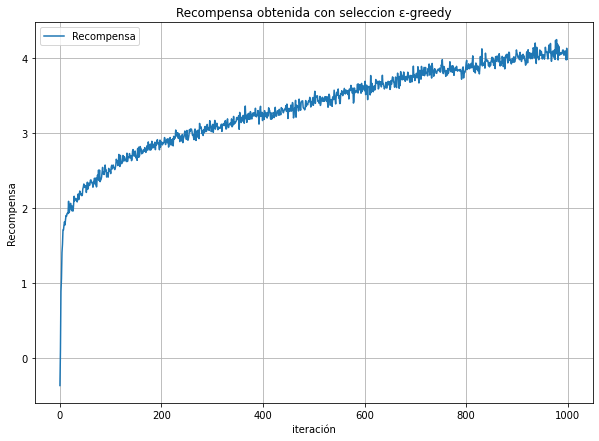


 Evolución de la recompensa promedio con parametro ε =  0.1 
 


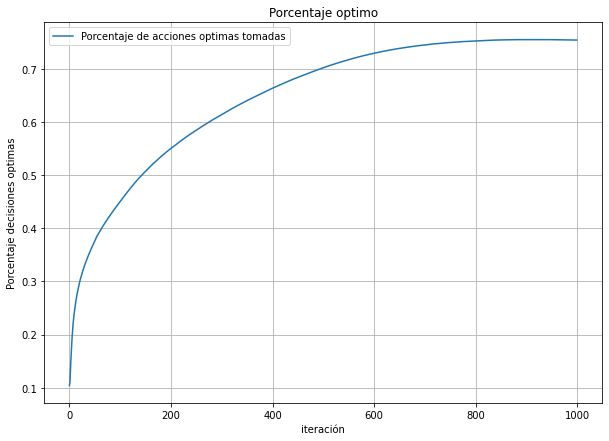


 Porcentaje de acciones óptimas tomadas con parametro ε =  0.1 
 


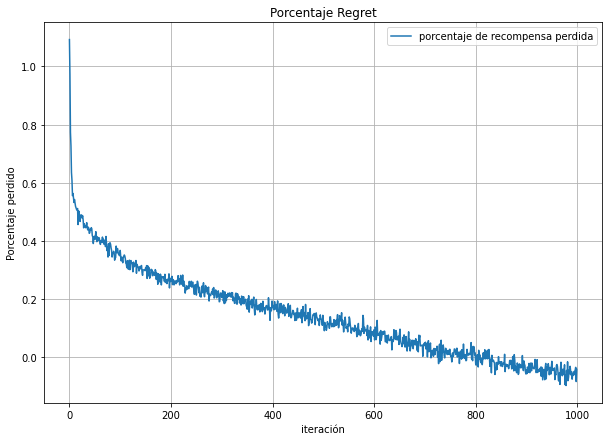


 Regret en porcentaje con parametro ε =  0.1 
 


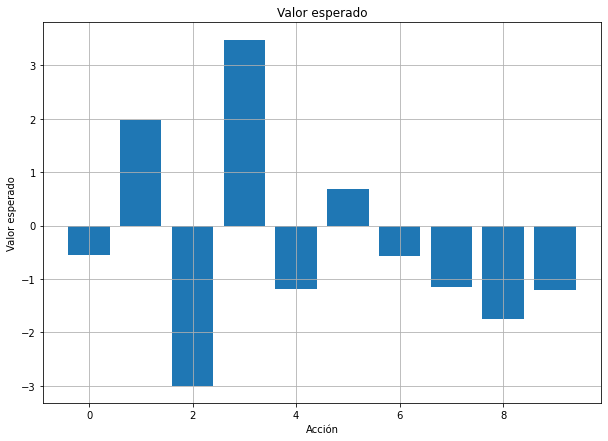


 Valor esperado de cada acción dado el parametro ε =  0.1 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
ve1,opt1,rm1,rea1=graficainador("ε-greedy",1000,0.1,2000)


2.   Con un valor de ε de 0.05 obtenemos las siguientes métricas:



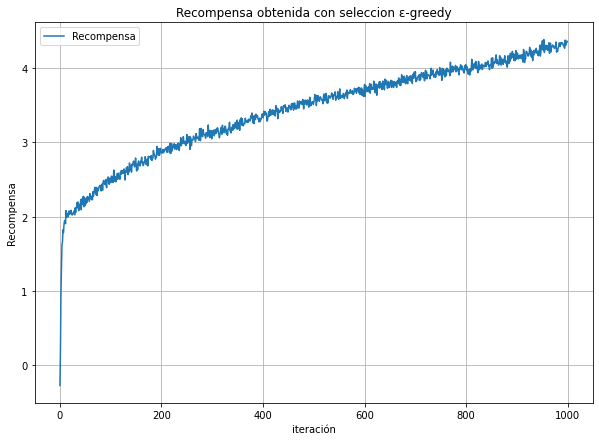


 Evolución de la recompensa promedio con parametro ε =  0.05 
 


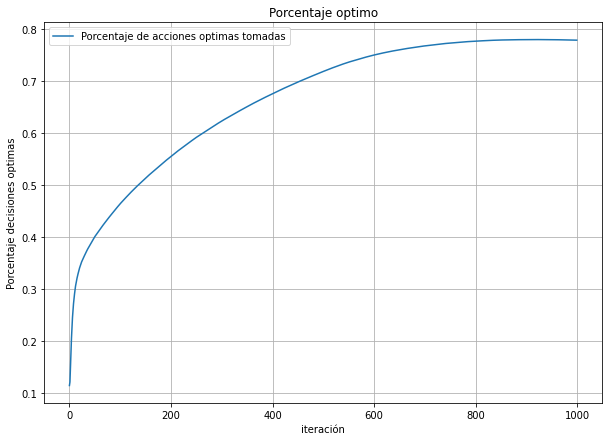


 Porcentaje de acciones óptimas tomadas con parametro ε =  0.05 
 


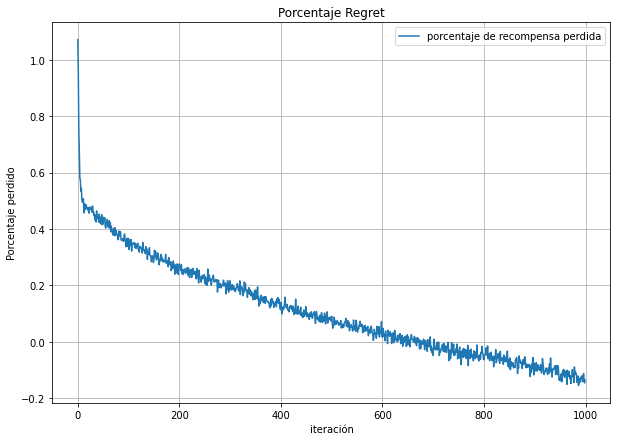


 Regret en porcentaje con parametro ε =  0.05 
 


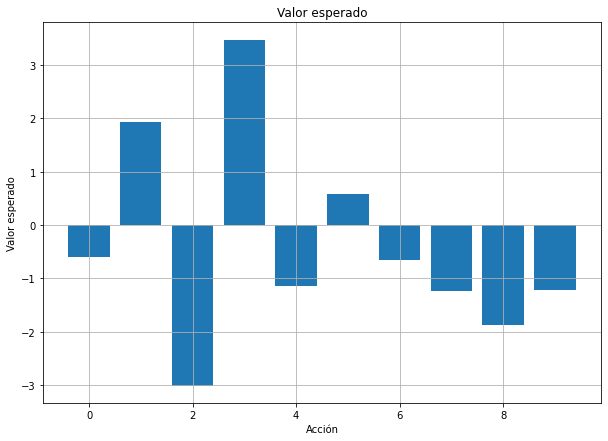


 Valor esperado de cada acción dado el parametro ε =  0.05 
 

  
 la acción encontrada como optima fue: 1


In [ ]:
ve2,opt2,rm2,rea2=graficainador("ε-greedy",1000,0.05,2000)


3.   Con un valor de ε de 0.01 obtenemos las siguientes métricas:



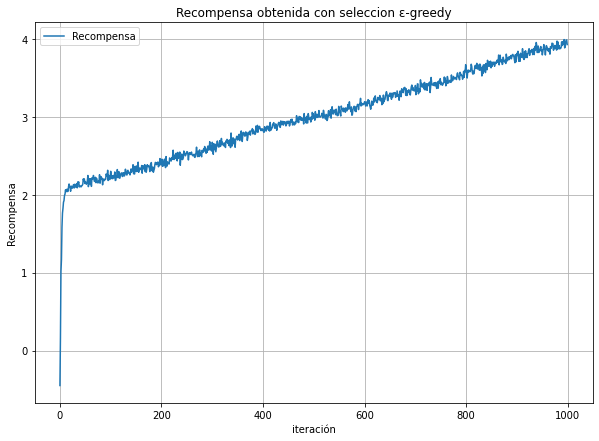


 Evolución de la recompensa promedio con parametro ε =  0.01 
 


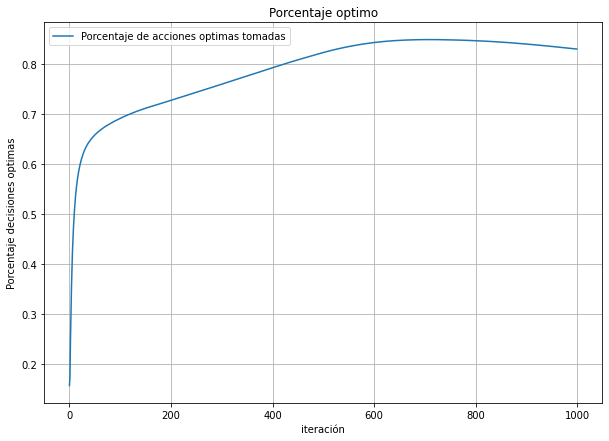


 Porcentaje de acciones óptimas tomadas con parametro ε =  0.01 
 


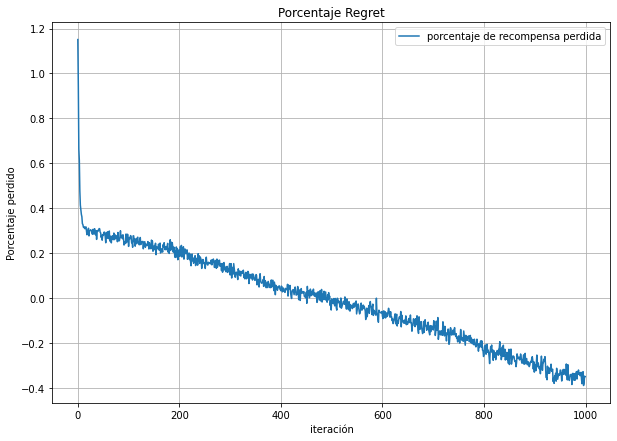


 Regret en porcentaje con parametro ε =  0.01 
 


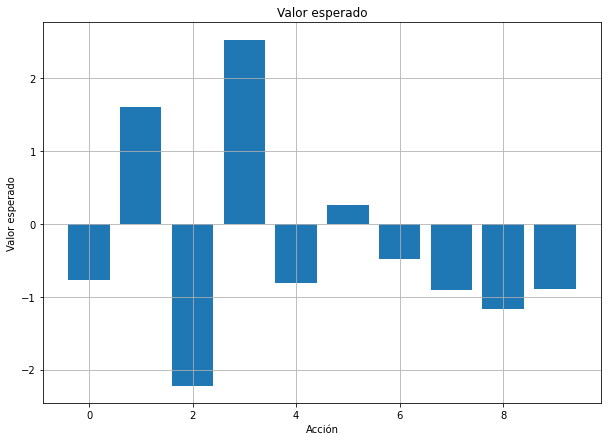


 Valor esperado de cada acción dado el parametro ε =  0.01 
 

  
 la acción encontrada como optima fue: 1


In [ ]:
ve3,opt3,rm3,rea3=graficainador("ε-greedy",1000,0.01,2000)

Realizando una comparación entre los diferentes ε respecto a la métrica de evolución de la recompenza obtenida tenemos:

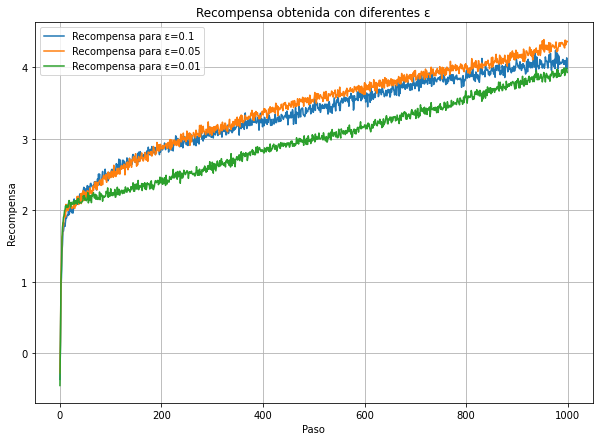

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(ve1)
plt.plot(ve2)
plt.plot(ve3)
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con diferentes ε')
plt.legend(['Recompensa para ε=0.1','Recompensa para ε=0.05','Recompensa para ε=0.01'])
plt.grid(True)
plt.show()

Tomando como referencia la métrica de la evolución de la recompenza obtenida el mejor parámetro fue con un ε= 0.05

## Método Upper Confidence Bound (UCB)

Con el método UCB se debe sintonizar el parámetro C, para este caso se probaron con los valores de 3, 2 y 1

1.   Con un valor de C de 3 obtenemos las siguientes métricas:

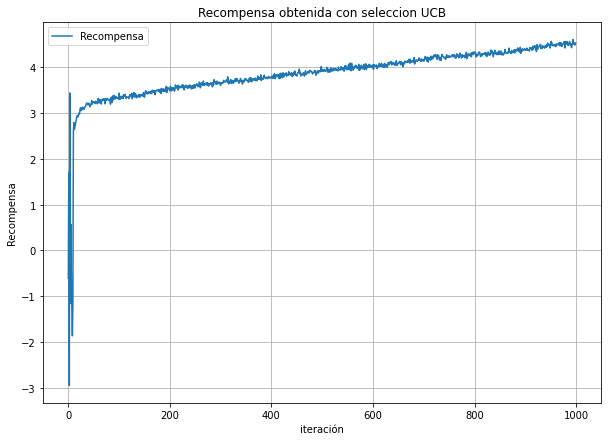


 Evolución de la recompensa promedio con parametro C =  3 
 


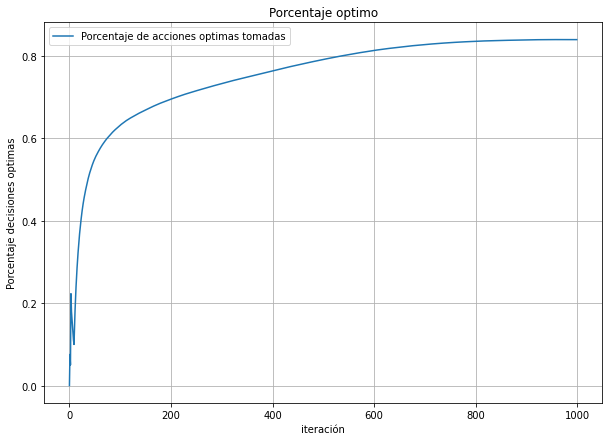


 Porcentaje de acciones óptimas tomadas con parametro C =  3 
 


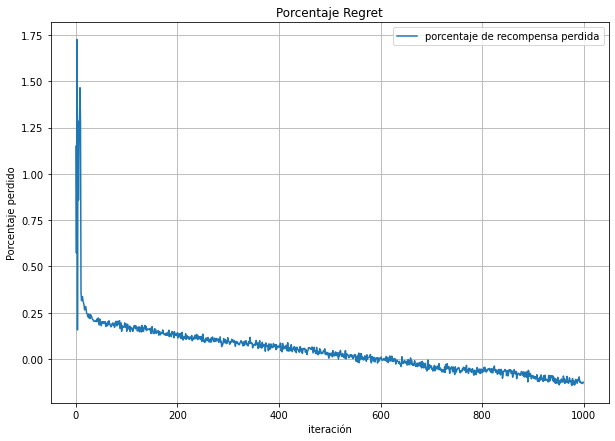


 Regret en porcentaje con parametro C =  3 
 


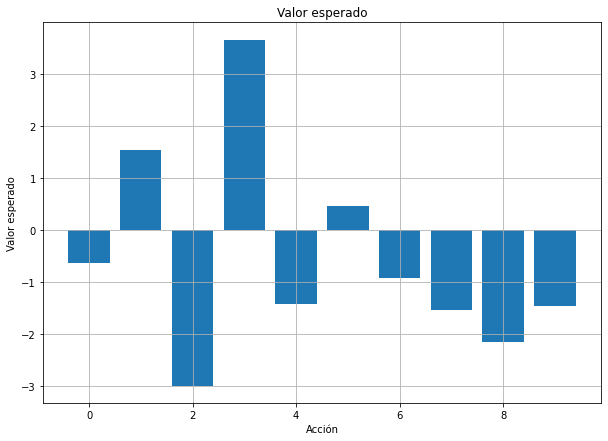


 Valor esperado de cada acción dado el parametro C =  3 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
veubc1,optubc1,rmubc1,reaucb1=graficainador("UCB",1000,3,2000)

2.   Con un valor de C de 2 obtenemos las siguientes métricas:

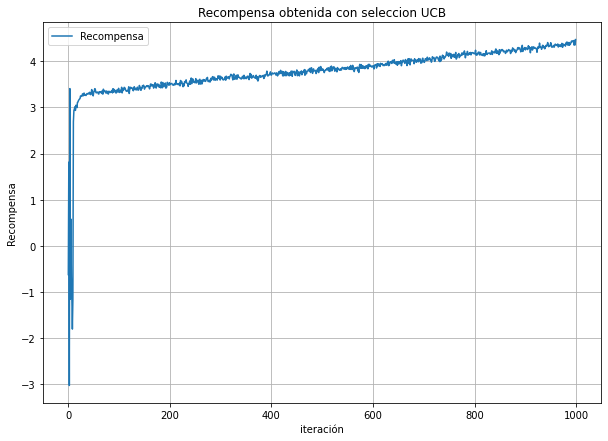


 Evolución de la recompensa promedio con parametro C =  2 
 


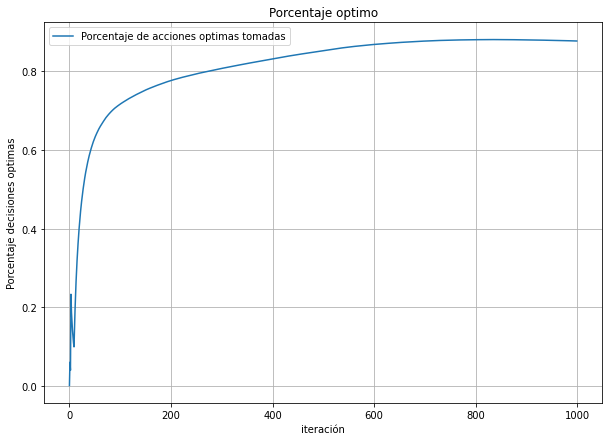


 Porcentaje de acciones óptimas tomadas con parametro C =  2 
 


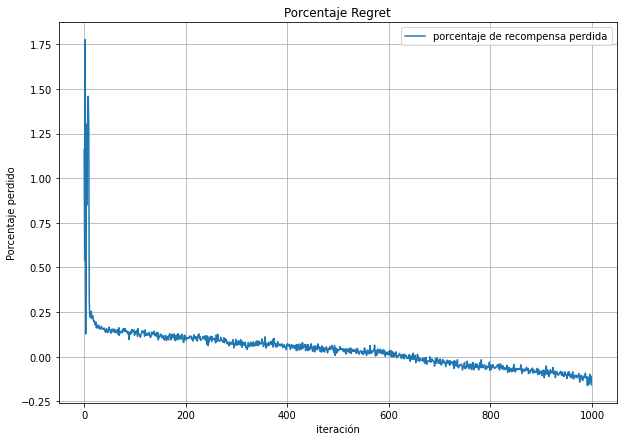


 Regret en porcentaje con parametro C =  2 
 


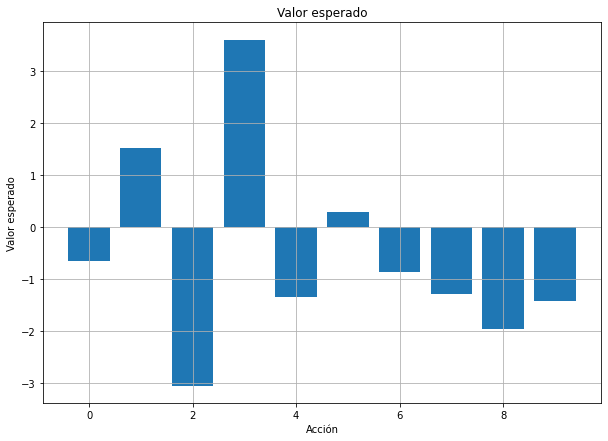


 Valor esperado de cada acción dado el parametro C =  2 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
veubc2,optubc2,rmubc2,reaucb2=graficainador("UCB",1000,2,2000)

3.   Con un valor de C de 1 obtenemos las siguientes métricas:

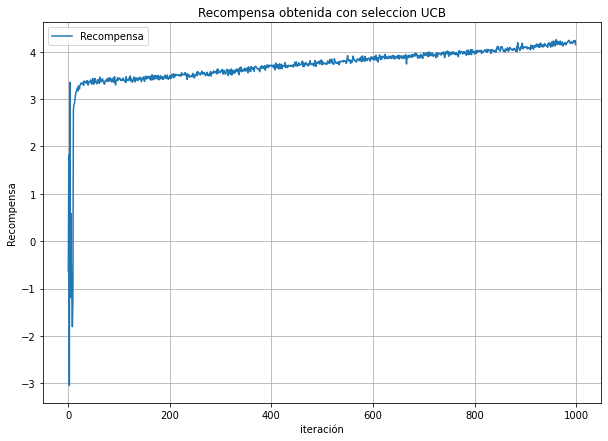


 Evolución de la recompensa promedio con parametro C =  1 
 


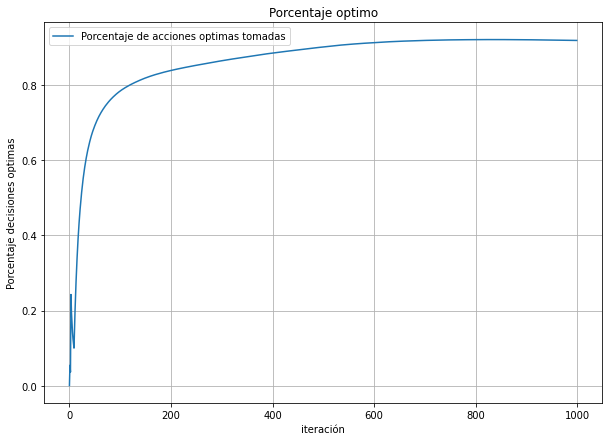


 Porcentaje de acciones óptimas tomadas con parametro C =  1 
 


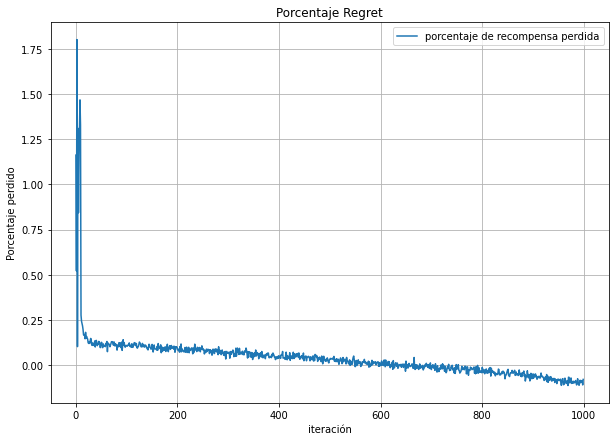


 Regret en porcentaje con parametro C =  1 
 


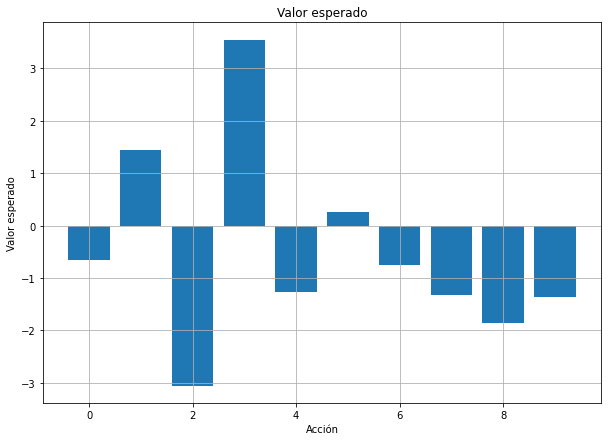


 Valor esperado de cada acción dado el parametro C =  1 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
veubc3,optubc3,rmubc3,reaucb3=graficainador("UCB",1000,1,2000)

Al realizar la comparación respecto a la evolución de la recompensa obtenida con los diferentes valores de C tenemos que:

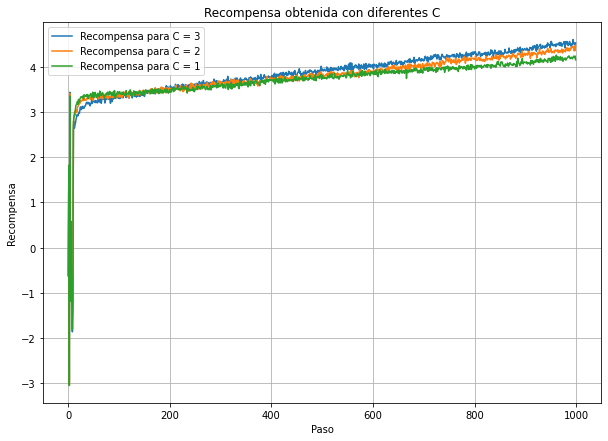

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(veubc1)
plt.plot(veubc2)
plt.plot(veubc3)
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con diferentes C')
plt.legend(['Recompensa para C = 3','Recompensa para C = 2','Recompensa para C = 1'])
plt.grid(True)
plt.show()

Por lo cual, el valor de C que permite una mayor recompenza es C=3

## Método Gradient Bandit

Con el método Gradient Bandit se debe sintonizar el parámetro α, para este caso se utilizaron valores de α de 0.1, 0.3 y 0.5

1.   Con un valor de α de 0.5 obtenemos las siguientes métricas:

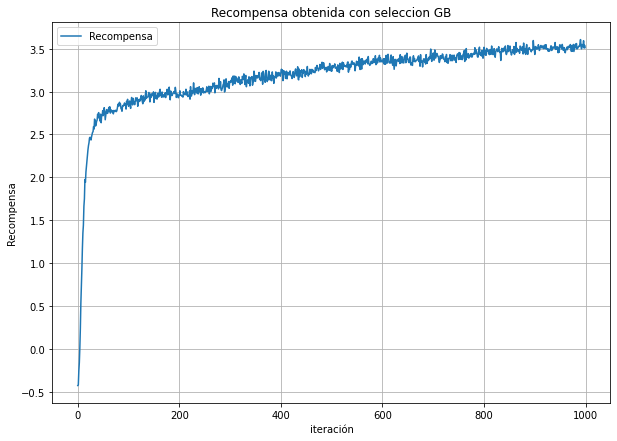


 Evolución de la recompensa promedio con parametro α =  0.5 
 


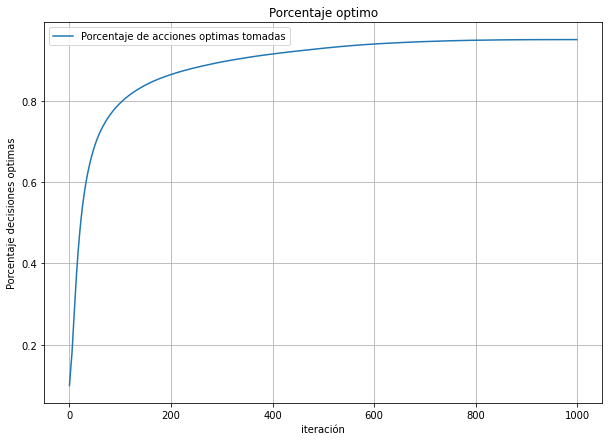


 Porcentaje de acciones óptimas tomadas con parametro α =  0.5 
 


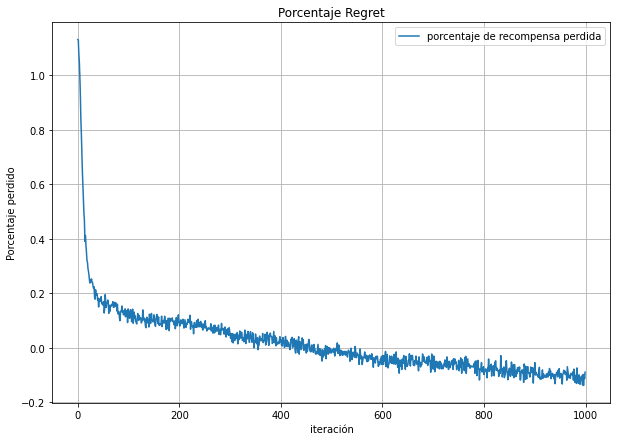


 Regret en porcentaje con parametro α =  0.5 
 


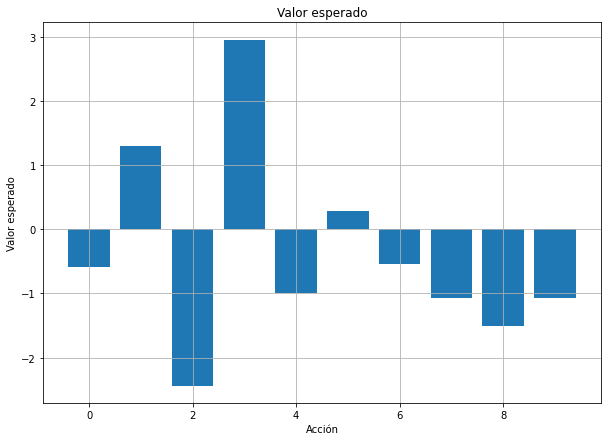


 Valor esperado de cada acción dado el parametro α =  0.5 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
vegb1,optgb1,rmgb1,regb1=graficainador("GB",1000,0.5,2000)

2.   Con un valor de α de 0.3 obtenemos las siguientes métricas:

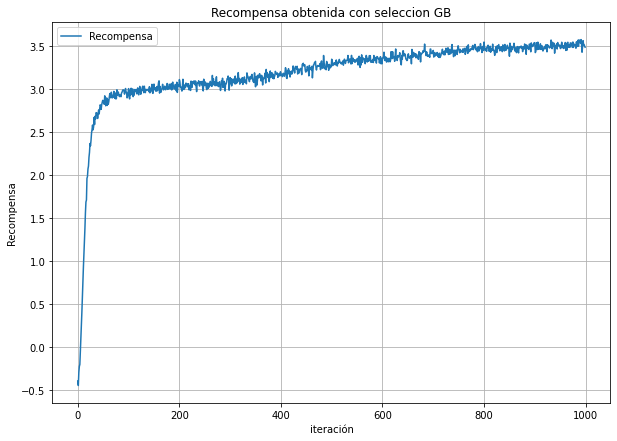


 Evolución de la recompensa promedio con parametro α =  0.3 
 


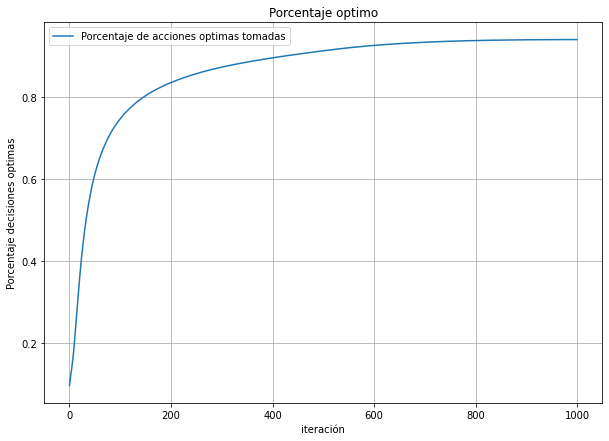


 Porcentaje de acciones óptimas tomadas con parametro α =  0.3 
 


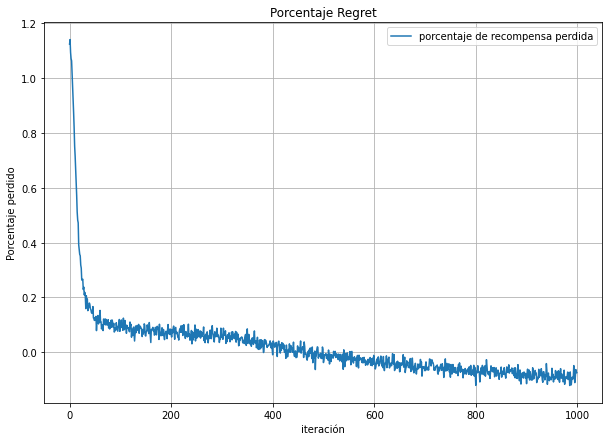


 Regret en porcentaje con parametro α =  0.3 
 


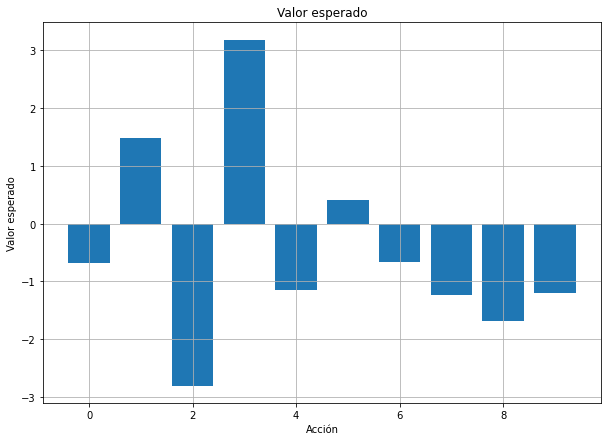


 Valor esperado de cada acción dado el parametro α =  0.3 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
vegb2,optgb2,rmgb2,regb2=graficainador("GB",1000,0.3,2000)

3.   Con un valor de α de 0.1 obtenemos las siguientes métricas:

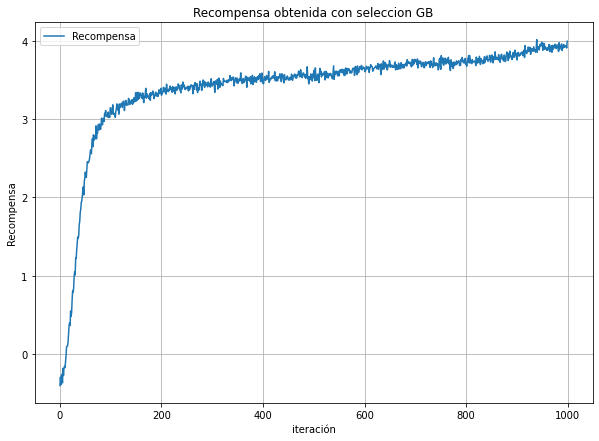


 Evolución de la recompensa promedio con parametro α =  0.1 
 


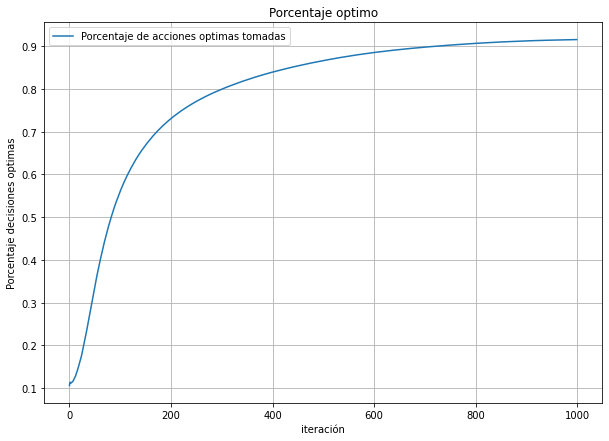


 Porcentaje de acciones óptimas tomadas con parametro α =  0.1 
 


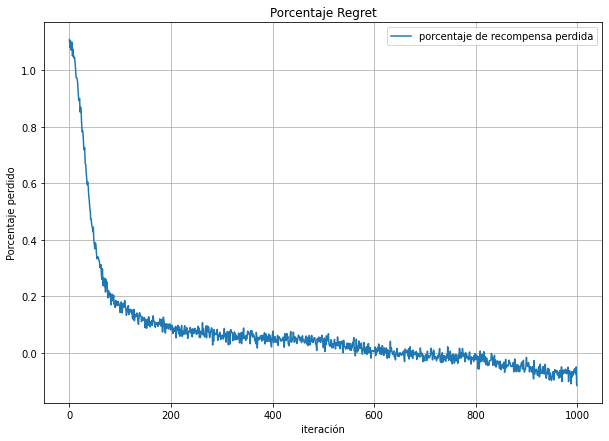


 Regret en porcentaje con parametro α =  0.1 
 


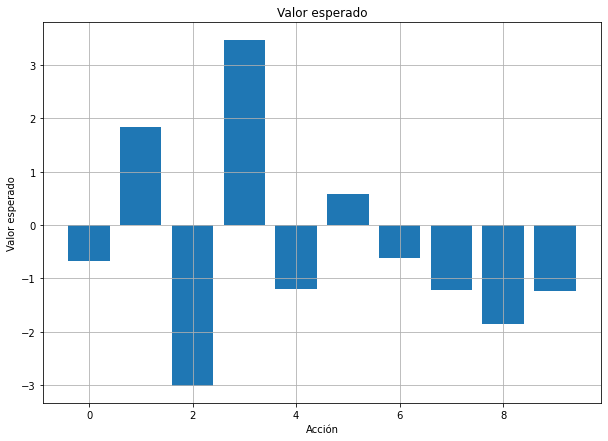


 Valor esperado de cada acción dado el parametro α =  0.1 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
vegb3,optgb3,rmgb3,regb3=graficainador("GB",1000,0.1,2000)

Realizando una comparación entre los diferentes α respecto a la métrica de evolución de la recompenza obtenida tenemos:

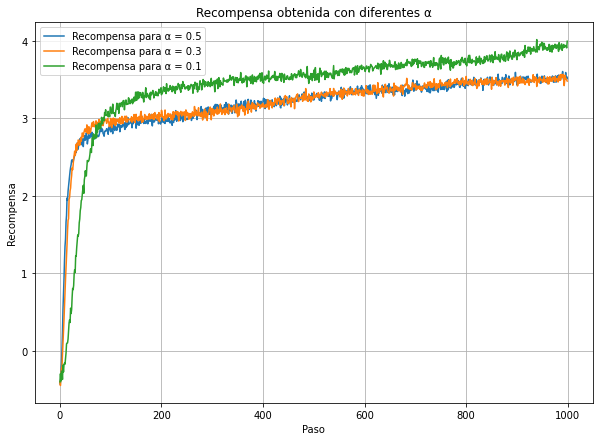

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(vegb1)
plt.plot(vegb2)
plt.plot(vegb3)
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con diferentes α')
plt.legend(['Recompensa para α = 0.5','Recompensa para α = 0.3','Recompensa para α = 0.1'])
plt.grid(True)
plt.show()

Teniendo asi como mejor parametro α = 0.1


## Métricas de evaluación: Comparación de 3 métodos para Escenario 1

In [ ]:
# Hiper-parámetros óptimos de cada método para el escenario 1
eps_1=0.05
v0_egreedy_1=5
v0_1=0
c_1=3
alpha_1=0.1

### Recompensa Promedio Ponderada

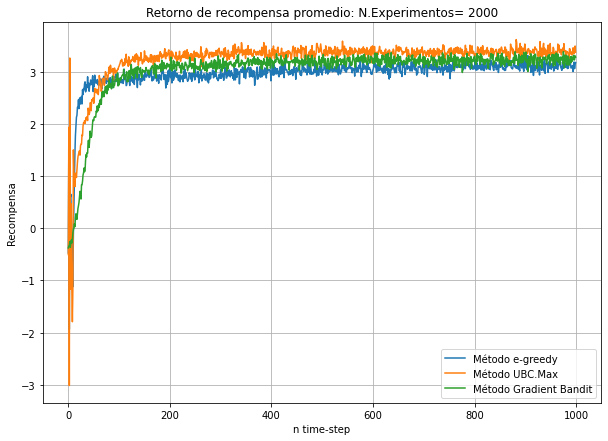

In [ ]:
# Resultados: Recompensa promedio ponderada 
N=2000 # numero de experimentos
n=1000 # time-step/iteraciones
actions = np.arange(0,10,1) # bandits/acciones
env=1 # ambiente/escenario

retornos_recompensa_prom_egreedy,retornos_recompensa_prom_ucbmax,retornos_recompensa_prom_gradient= recompensa_promedio_ponderada (N,n,actions,env,eps_1,v0_egreedy_1,v0_1,c_1,alpha_1)


### Porcentaje de Acción Óptima Ponderada

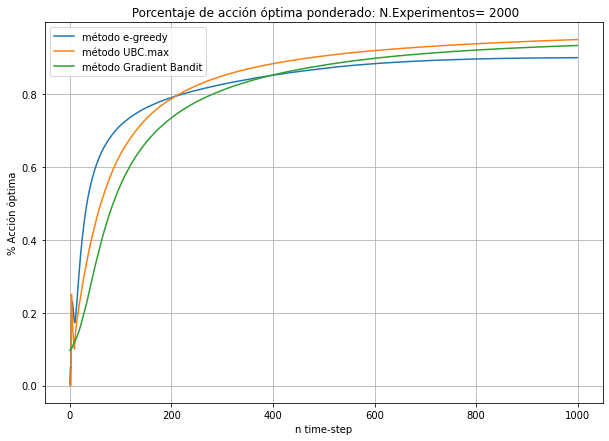

In [ ]:
# Resultados: % Acción Óptima Ponderada
N=2000 # numero de experimentos
n=1000 # time-step/iteraciones
actions = np.arange(0,10,1) # bandits/acciones
env=1 # ambiente/escenario

porcentaje_accion_opt_ponderado_greedy,porcentaje_accion_opt_ponderado_ubcmax,porcentaje_accion_opt_ponderado_gradient= porcentaje_accion_opt_ponderado (N,n,actions,env,eps_1,v0_egreedy_1,v0_1,c_1,alpha_1)

### Regret Ponderado

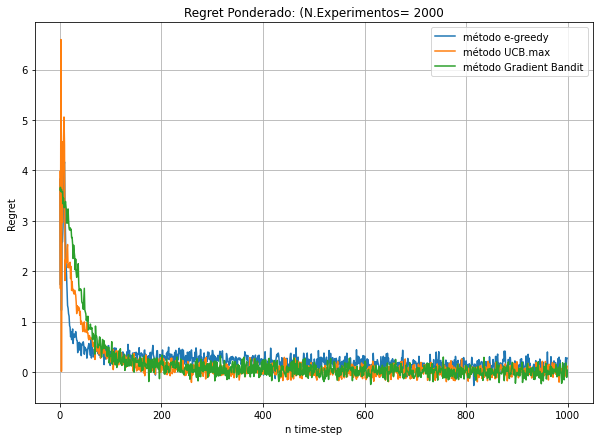

In [ ]:
# Resultados: Regret Ponderado
N=2000 # numero de experimentos
n=1000 # time-step/iteraciones
actions = np.arange(0,10,1) # bandits/acciones
env=1 # ambiente/escenario

regret_ponderado_egreedy,regret_ponderado_ucbmax,regret_ponderado_gradient = regret_ponderado (N,n,actions,env,eps_1,v0_egreedy_1,v0_1,c_1,alpha_1)



---



# Escenario 2

## Método ε-Greedy

Con el método épsilon greedy se requiere sintonizar el parámetro ε. Por lo cual, se procedió a probar con diferentes valores de ε, los valores usados fueron 0.1, 0.05 y 0.01 ya que en la literatura no se suelen usar valores mayores al 10%

1.   Con un valor de ε de 0.1 obtenemos las siguientes métricas:





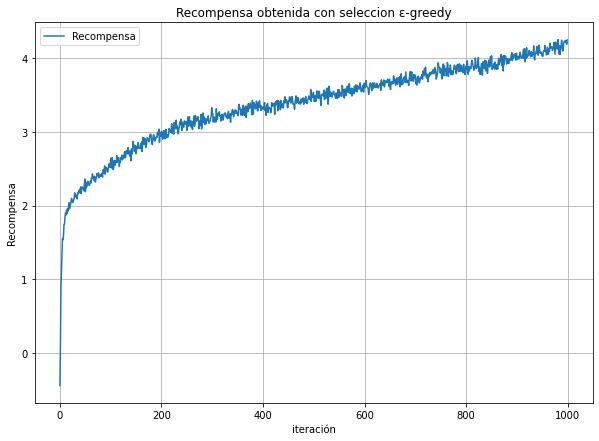


 Evolución de la recompensa promedio con parametro ε =  0.1 
 


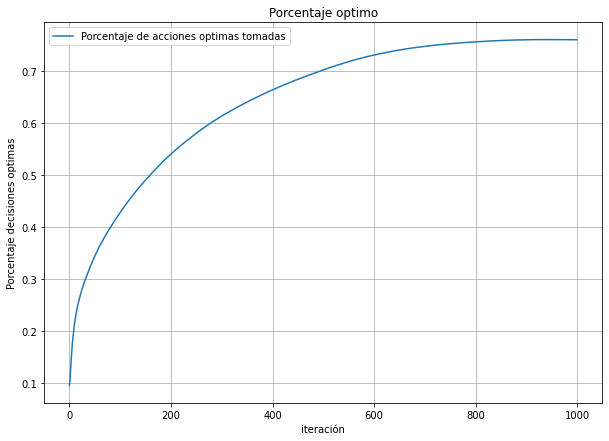


 Porcentaje de acciones óptimas tomadas con parametro ε =  0.1 
 


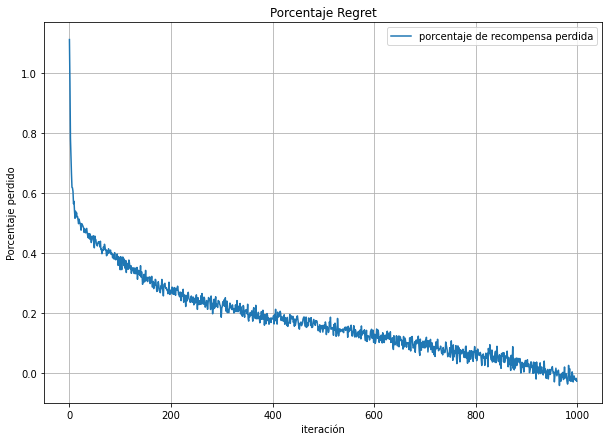


 Regret en porcentaje con parametro ε =  0.1 
 


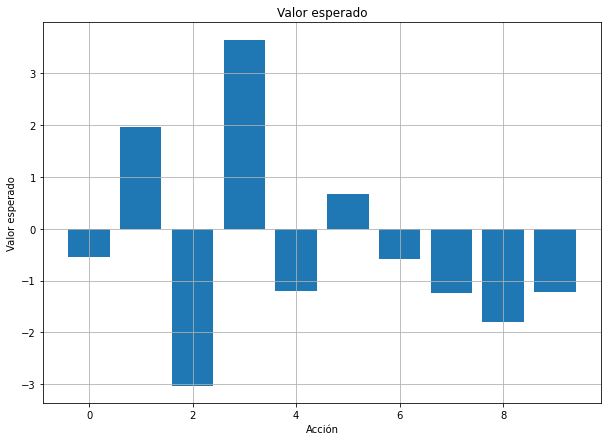


 Valor esperado de cada acción dado el parametro ε =  0.1 
 

  
 la acción encontrada como optima fue: 1


In [ ]:
ve1,opt1,rm1,rea1=graficainador("ε-greedy",1000,0.1,2000)


2.   Con un valor de ε de 0.05 obtenemos las siguientes métricas:



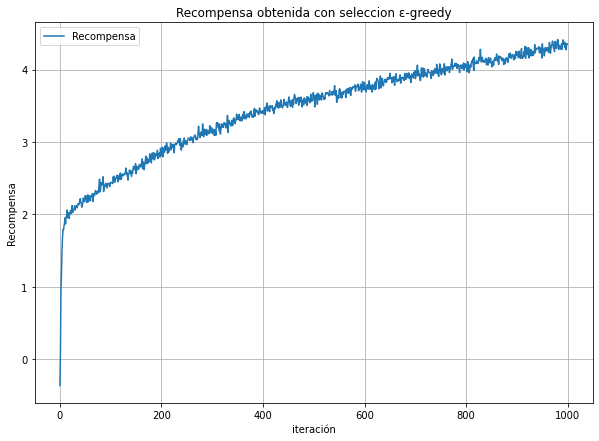


 Evolución de la recompensa promedio con parametro ε =  0.05 
 


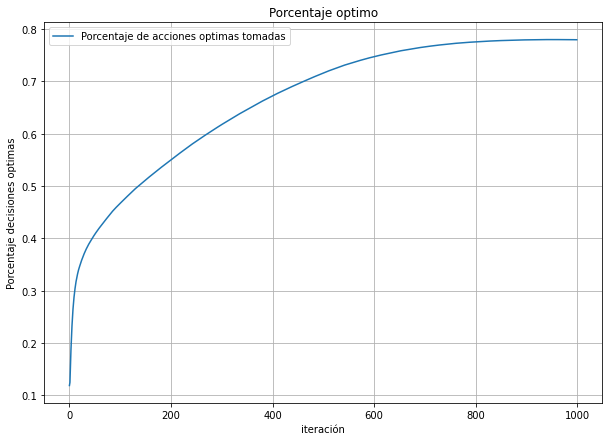


 Porcentaje de acciones óptimas tomadas con parametro ε =  0.05 
 


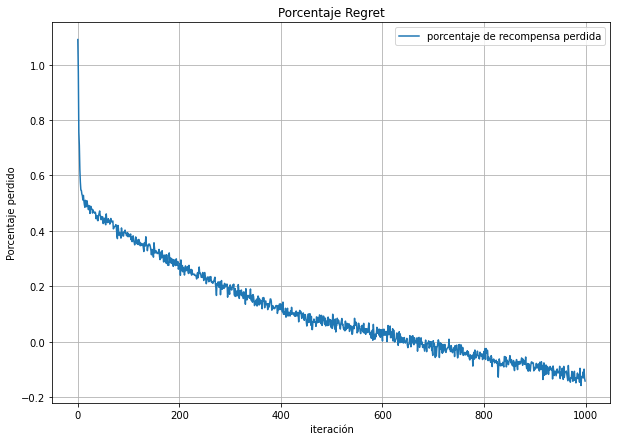


 Regret en porcentaje con parametro ε =  0.05 
 


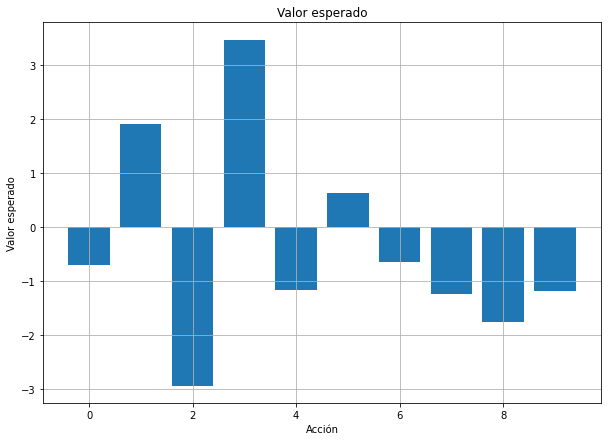


 Valor esperado de cada acción dado el parametro ε =  0.05 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
ve2,opt2,rm2,rea2=graficainador("ε-greedy",1000,0.05,2000)


3.   Con un valor de ε de 0.01 obtenemos las siguientes métricas:



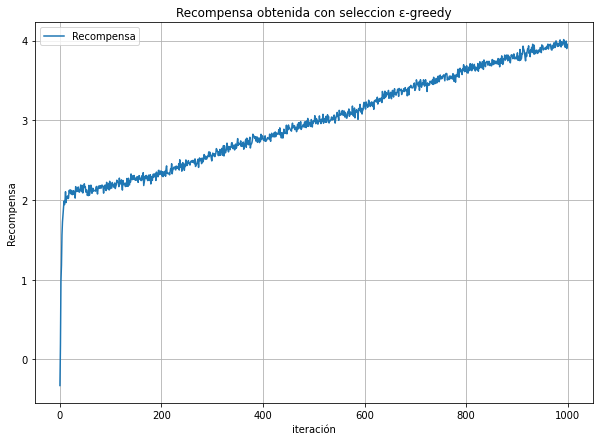


 Evolución de la recompensa promedio con parametro ε =  0.01 
 


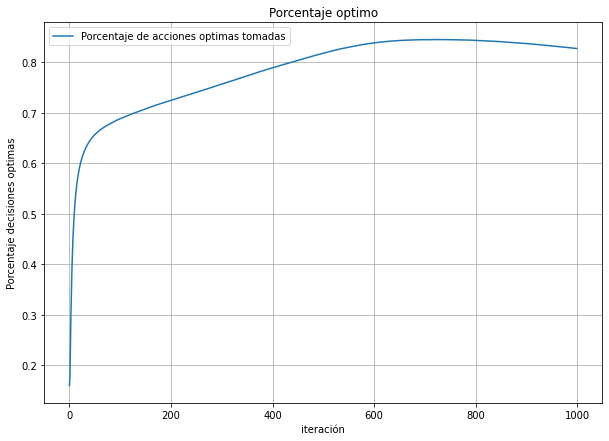


 Porcentaje de acciones óptimas tomadas con parametro ε =  0.01 
 


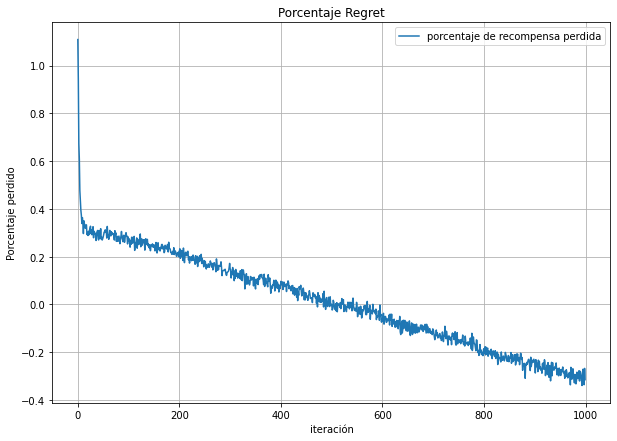


 Regret en porcentaje con parametro ε =  0.01 
 


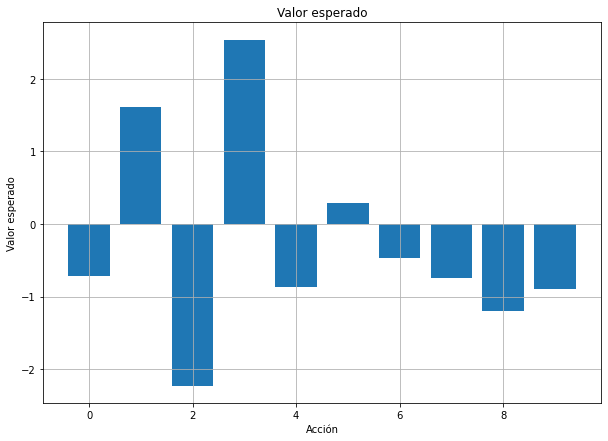


 Valor esperado de cada acción dado el parametro ε =  0.01 
 

  
 la acción encontrada como optima fue: 1


In [ ]:
ve3,opt3,rm3,rea3=graficainador("ε-greedy",1000,0.01,2000)

Realizando una comparación entre los diferentes ε respecto a la métrica de evolución de la recompenza obtenida tenemos:

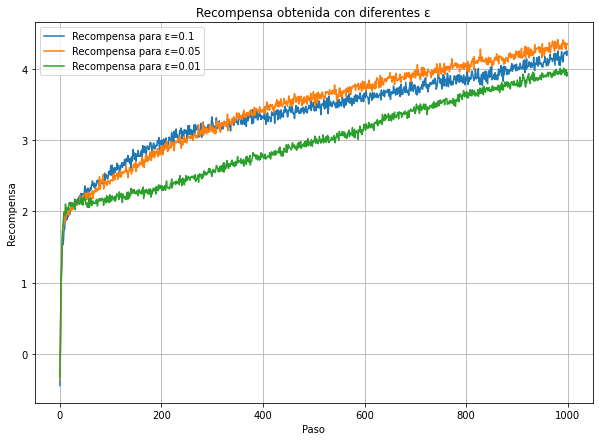

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(ve1)
plt.plot(ve2)
plt.plot(ve3)
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con diferentes ε')
plt.legend(['Recompensa para ε=0.1','Recompensa para ε=0.05','Recompensa para ε=0.01'])
plt.grid(True)
plt.show()

Teniendo asi que el parámetro ε con mejor recompenza es de ε = 0.05

## Método Upper Confidence Bound (UCB)

Con el método UCB se debe sintonizar el parámetro C, para este caso se probaron con los valores de 3, 2 y 1

1.   Con un valor de C de 3 obtenemos las siguientes métricas:

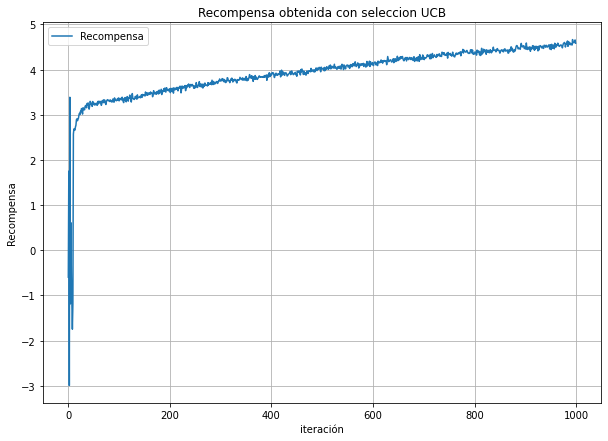


 Evolución de la recompensa promedio con parametro C =  3 
 


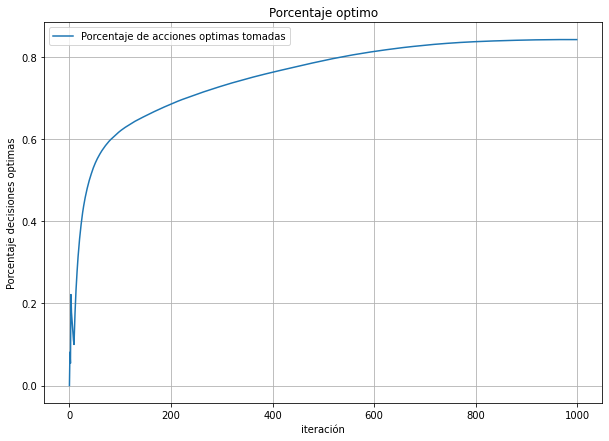


 Porcentaje de acciones óptimas tomadas con parametro C =  3 
 


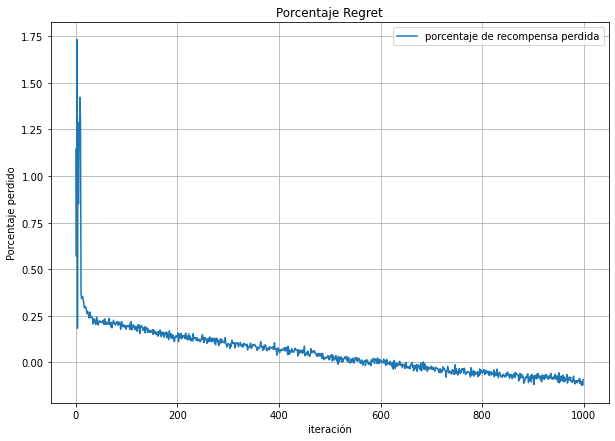


 Regret en porcentaje con parametro C =  3 
 


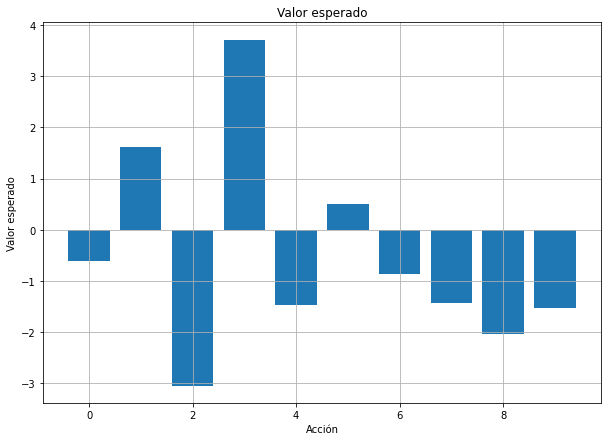


 Valor esperado de cada acción dado el parametro C =  3 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
veubc1,optubc1,rmubc1,reaucb1=graficainador("UCB",1000,3,2000)

2.   Con un valor de C de 2 obtenemos las siguientes métricas:

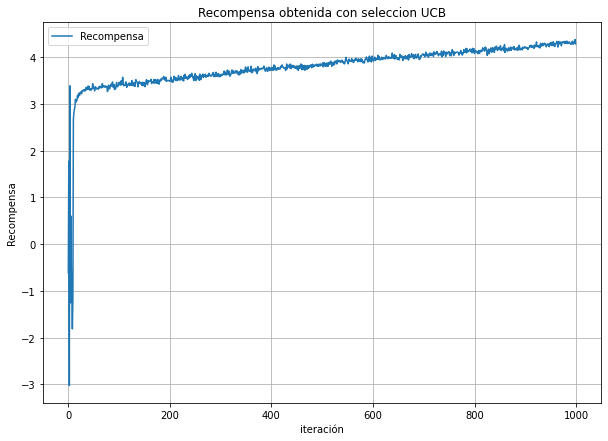


 Evolución de la recompensa promedio con parametro C =  2 
 


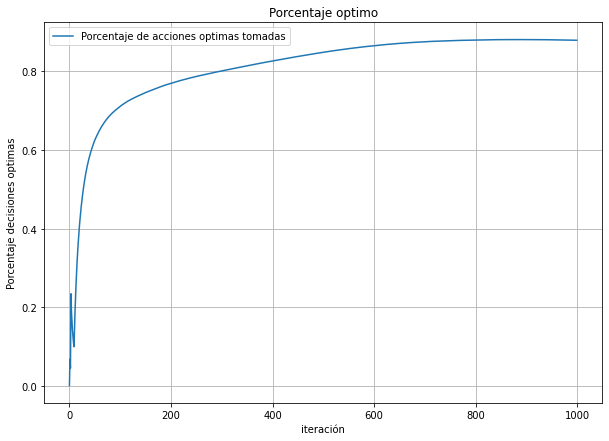


 Porcentaje de acciones óptimas tomadas con parametro C =  2 
 


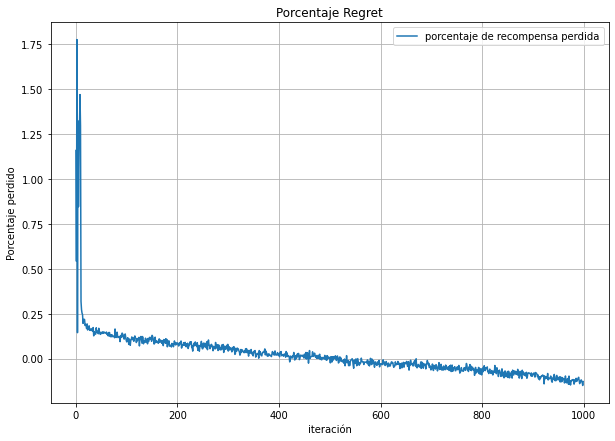


 Regret en porcentaje con parametro C =  2 
 


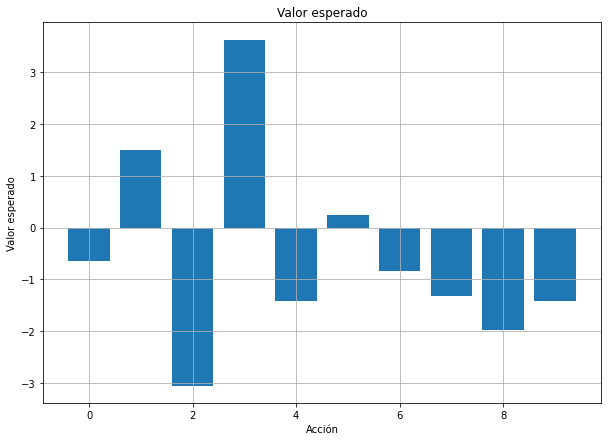


 Valor esperado de cada acción dado el parametro C =  2 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
veubc2,optubc2,rmubc2,reaucb2=graficainador("UCB",1000,2,2000)

3.   Con un valor de C de 1 obtenemos las siguientes métricas:

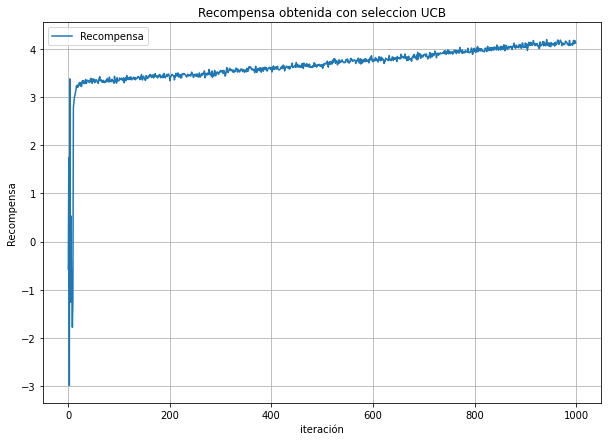


 Evolución de la recompensa promedio con parametro C =  1 
 


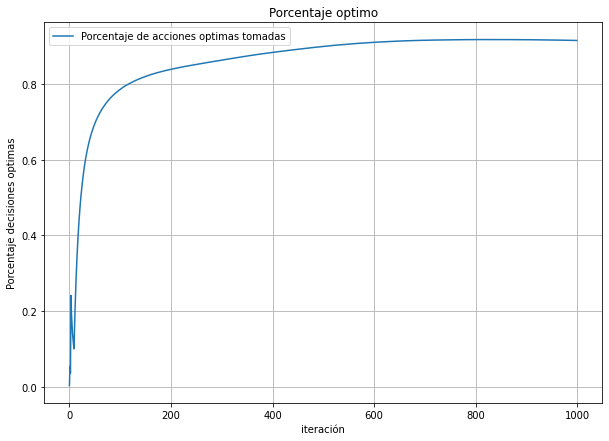


 Porcentaje de acciones óptimas tomadas con parametro C =  1 
 


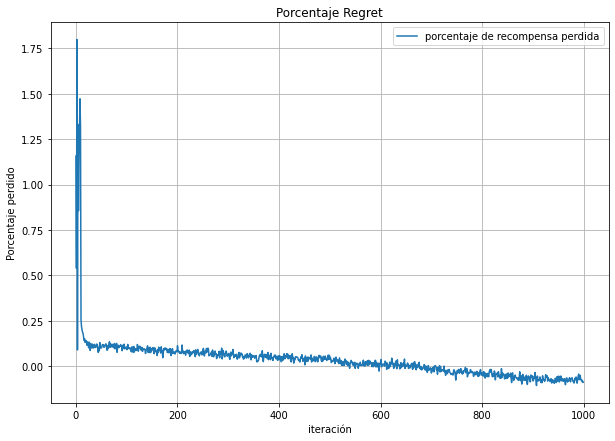


 Regret en porcentaje con parametro C =  1 
 


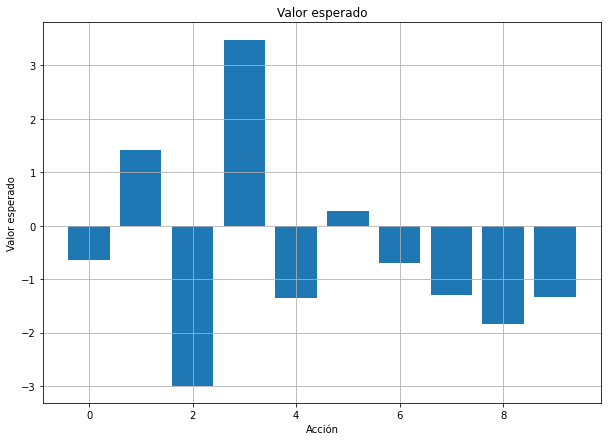


 Valor esperado de cada acción dado el parametro C =  1 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
veubc3,optubc3,rmubc3,reaucb3=graficainador("UCB",1000,1,2000)

Al realizar la comparación respecto a la evolución de la recompensa obtenida con los diferentes valores de C tenemos que:

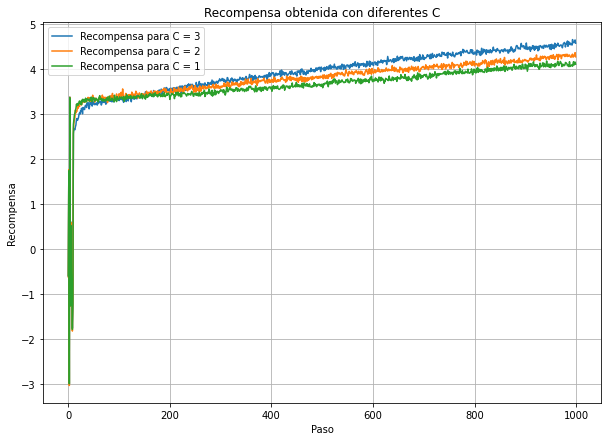

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(veubc1)
plt.plot(veubc2)
plt.plot(veubc3)
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con diferentes C')
plt.legend(['Recompensa para C = 3','Recompensa para C = 2','Recompensa para C = 1'])
plt.grid(True)
plt.show()

No se puede evidenciar una diferencia notable en el final de la recompensa obtenida. Sin embargo, dado a que con el valor de 1 converge mas rápido a la recompenza máxima se elige como mejor este C = 1

## Método Gradient Bandit

Con el método Gradient Bandit se debe sintonizar el parámetro α, para este caso se utilizaron valores de α de 0.1, 0.3 y 0.5

1.   Con un valor de α de 0.5 obtenemos las siguientes métricas:

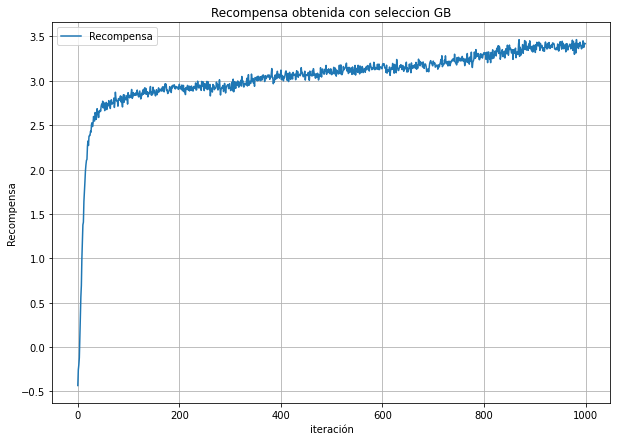


 Evolución de la recompensa promedio con parametro α =  0.5 
 


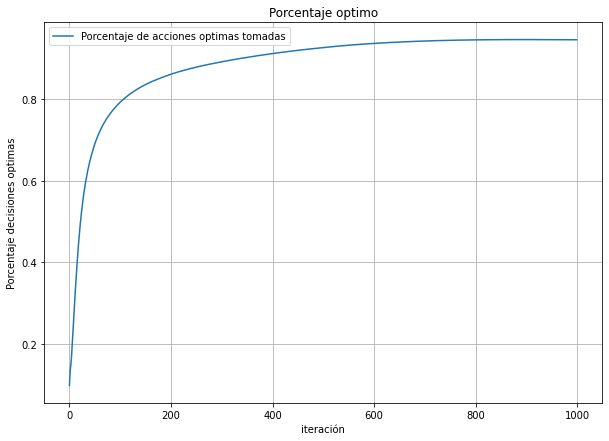


 Porcentaje de acciones óptimas tomadas con parametro α =  0.5 
 


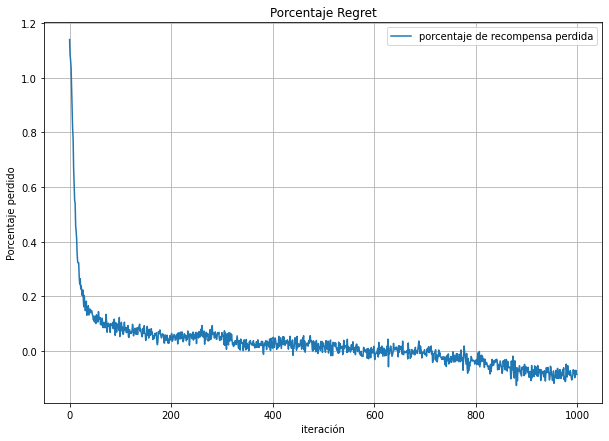


 Regret en porcentaje con parametro α =  0.5 
 


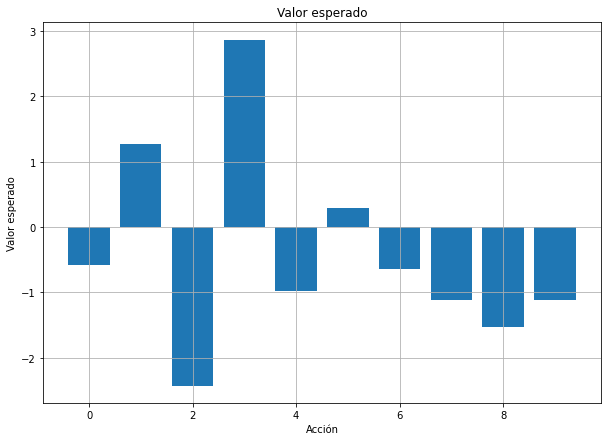


 Valor esperado de cada acción dado el parametro α =  0.5 
 

  
 la acción encontrada como optima fue: 1


In [ ]:
vegb1,optgb1,rmgb1,regb1=graficainador("GB",1000,0.5,2000)

2.   Con un valor de α de 0.3 obtenemos las siguientes métricas:

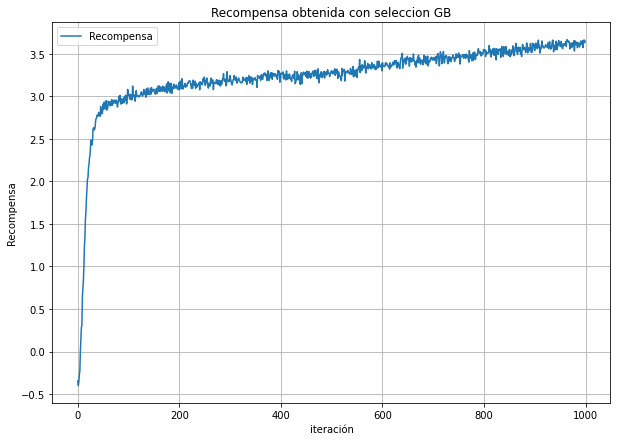


 Evolución de la recompensa promedio con parametro α =  0.3 
 


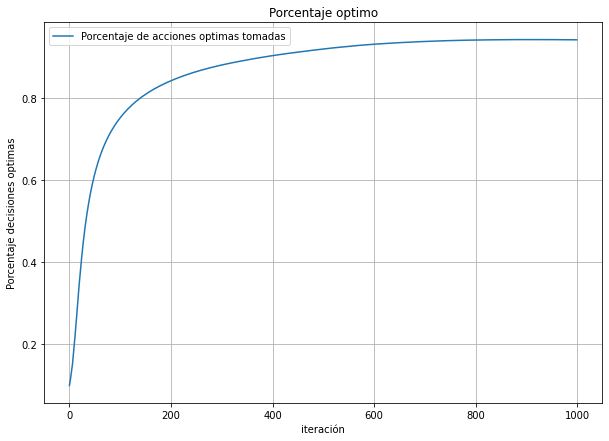


 Porcentaje de acciones óptimas tomadas con parametro α =  0.3 
 


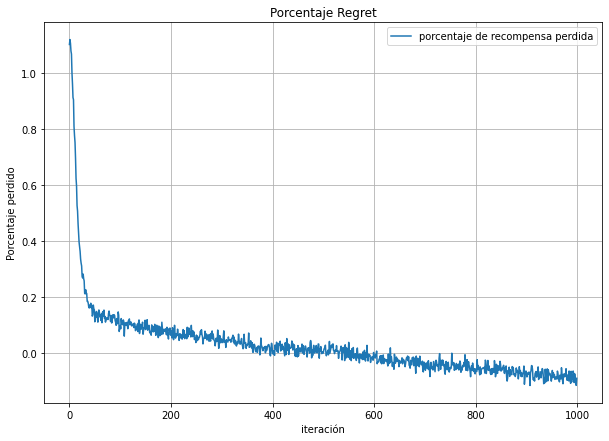


 Regret en porcentaje con parametro α =  0.3 
 


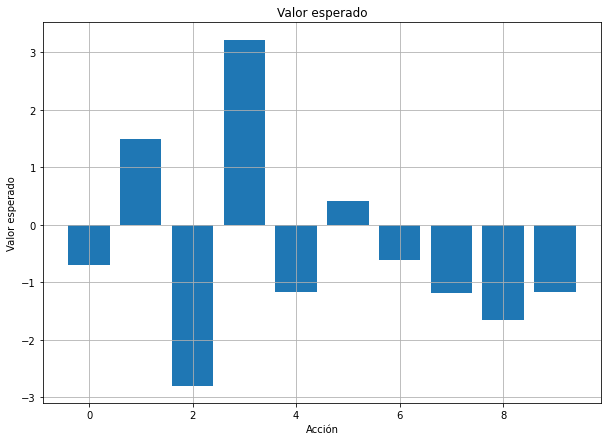


 Valor esperado de cada acción dado el parametro α =  0.3 
 

  
 la acción encontrada como optima fue: 1


In [ ]:
vegb2,optgb2,rmgb2,regb2=graficainador("GB",1000,0.3,2000)

3.   Con un valor de α de 0.1 obtenemos las siguientes métricas:

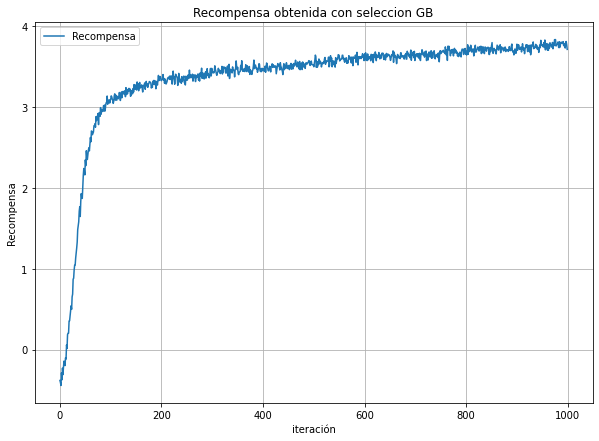


 Evolución de la recompensa promedio con parametro α =  0.1 
 


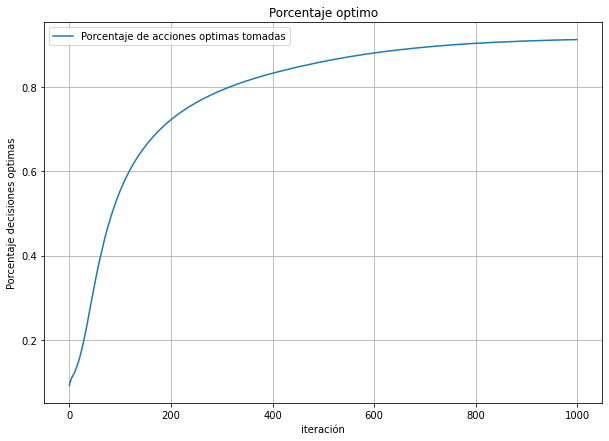


 Porcentaje de acciones óptimas tomadas con parametro α =  0.1 
 


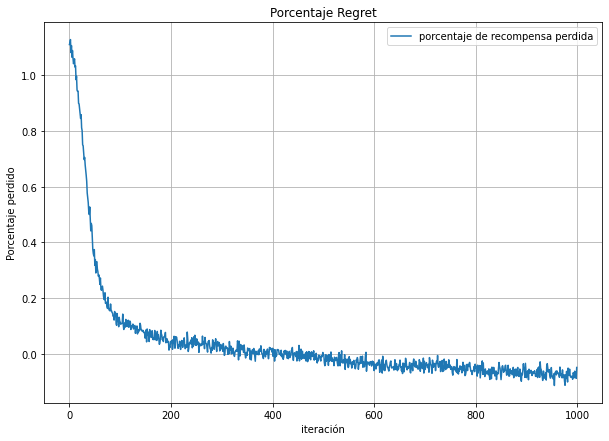


 Regret en porcentaje con parametro α =  0.1 
 


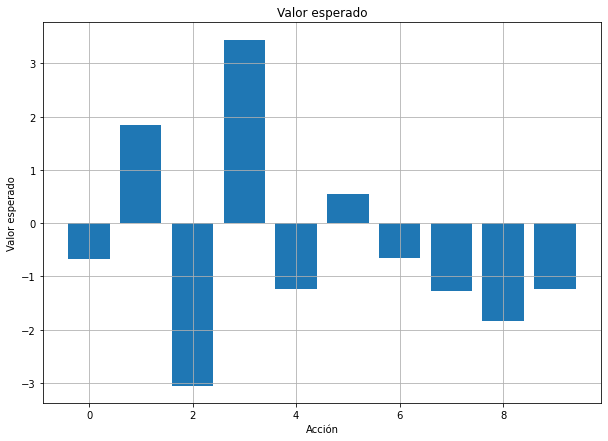


 Valor esperado de cada acción dado el parametro α =  0.1 
 

  
 la acción encontrada como optima fue: 1


In [ ]:
vegb3,optgb3,rmgb3,regb3=graficainador("GB",1000,0.1,2000)

Realizando una comparación entre los diferentes α respecto a la métrica de evolución de la recompenza obtenida tenemos:

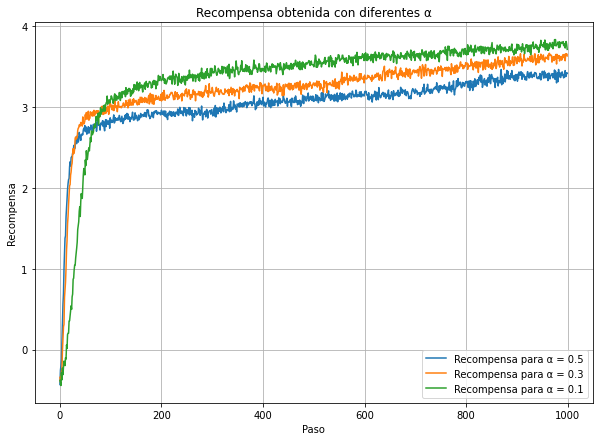

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(vegb1)
plt.plot(vegb2)
plt.plot(vegb3)
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con diferentes α')
plt.legend(['Recompensa para α = 0.5','Recompensa para α = 0.3','Recompensa para α = 0.1'])
plt.grid(True)
plt.show()

Por lo cual, el valor de α que maximiza la recompensa esperada es α = 0.1


## Métricas de evaluación: Comparación de 3 métodos para Escenario 2

In [ ]:
# Hiper-parámetros óptimos de cada método para el escenario 2
eps_2=0.05
v0_egreedy_2=5
v0_2=0
c_2=1
alpha_2=0.1

### Recompensa Promedio Ponderada

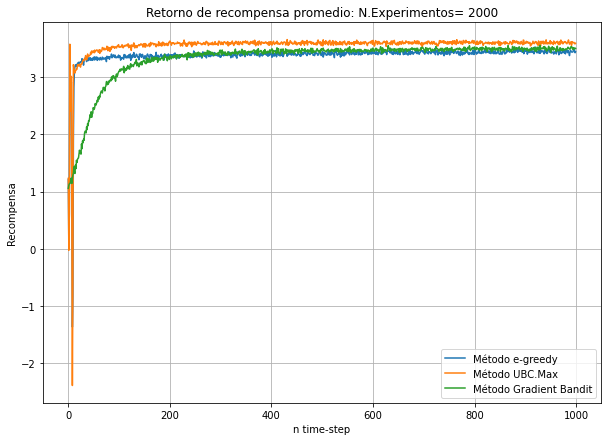

In [ ]:
# Resultados: Recompensa promedio ponderada 
N=2000 # numero de experimentos
n=1000 # time-step/iteraciones
actions = np.arange(0,10,1) # bandits/acciones
env=2 # ambiente/escenario

retornos_recompensa_prom_egreedy,retornos_recompensa_prom_ucbmax,retornos_recompensa_prom_gradient= recompensa_promedio_ponderada (N,n,actions,env,eps_2,v0_egreedy_2,v0_2,c_2,alpha_2)


### Porcentaje de Acción Óptima Ponderada

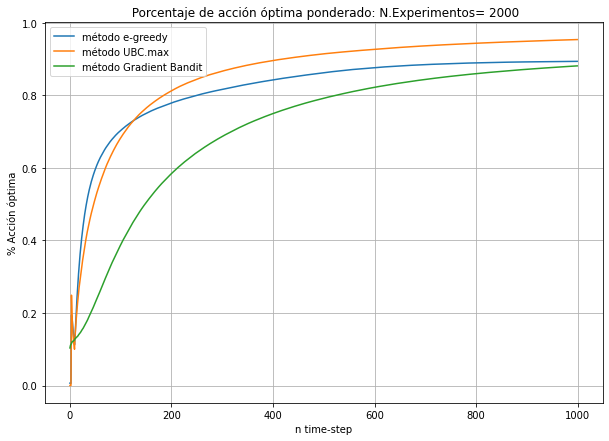

In [ ]:
# Resultados: % Acción Óptima Ponderada
N=2000 # numero de experimentos
n=1000 # time-step/iteraciones
actions = np.arange(0,10,1) # bandits/acciones
env=2 # ambiente/escenario

porcentaje_accion_opt_ponderado_greedy,porcentaje_accion_opt_ponderado_ubcmax,porcentaje_accion_opt_ponderado_gradient= porcentaje_accion_opt_ponderado (N,n,actions,env,eps_2,v0_egreedy_2,v0_2,c_2,alpha_2)

### Regret Ponderado

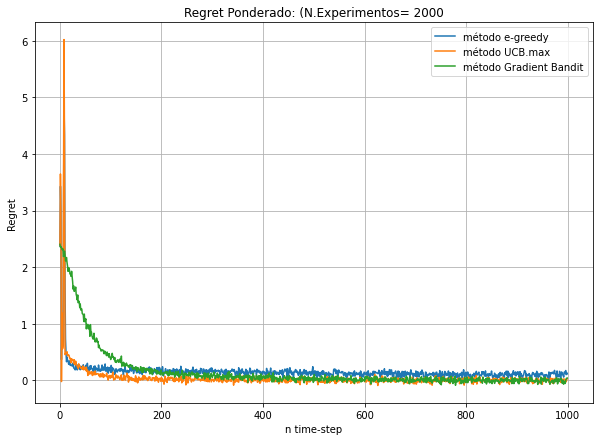

In [ ]:
# Resultados: Regret Ponderado
N=2000 # numero de experimentos
n=1000 # time-step/iteraciones
actions = np.arange(0,10,1) # bandits/acciones
env=2 # ambiente/escenario

regret_ponderado_egreedy,regret_ponderado_ucbmax,regret_ponderado_gradient = regret_ponderado (N,n,actions,env,eps_2,v0_egreedy_2,v0_2,c_2,alpha_2)

# Escenario 3

## Método ε-Greedy

Con el método épsilon greedy se requiere sintonizar el parámetro ε. Por lo cual, se procedió a probar con diferentes valores de ε, los valores usados fueron 0.1, 0.05 y 0.01 ya que en la literatura no se suelen usar valores mayores al 10%

1.   Con un valor de ε de 0.1 obtenemos las siguientes métricas:





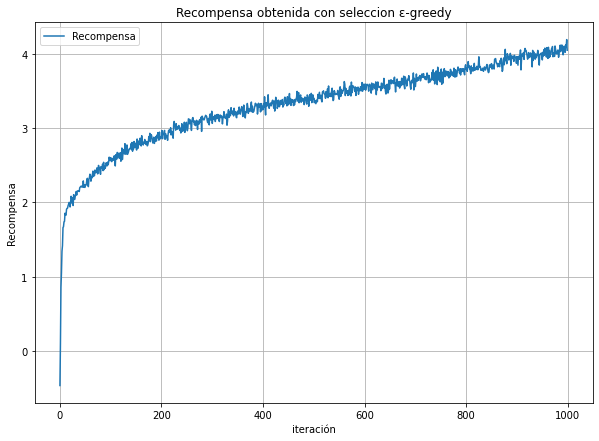


 Evolución de la recompensa promedio con parametro ε =  0.1 
 


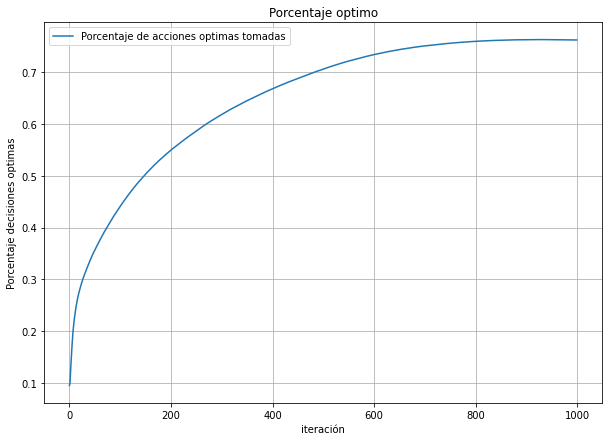


 Porcentaje de acciones óptimas tomadas con parametro ε =  0.1 
 


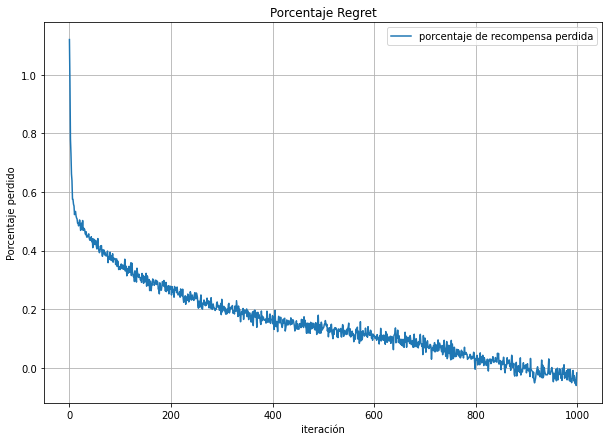


 Regret en porcentaje con parametro ε =  0.1 
 


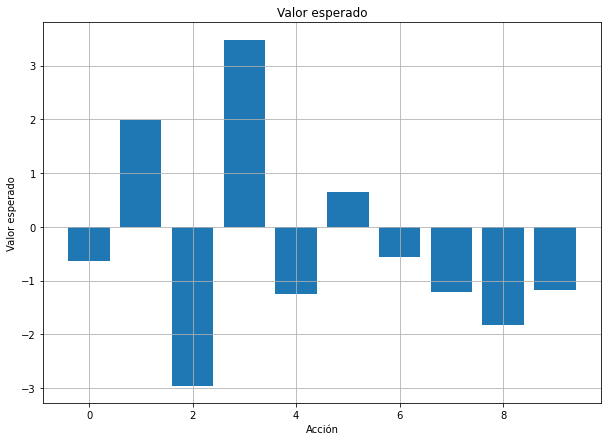


 Valor esperado de cada acción dado el parametro ε =  0.1 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
ve1,opt1,rm1,rea1=graficainador("ε-greedy",1000,0.1,2000)


2.   Con un valor de ε de 0.05 obtenemos las siguientes métricas:



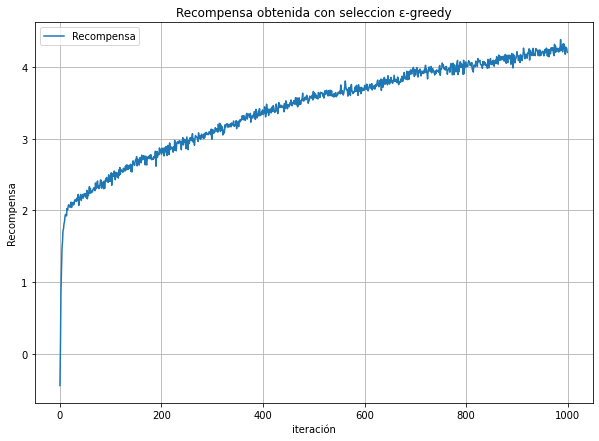


 Evolución de la recompensa promedio con parametro ε =  0.05 
 


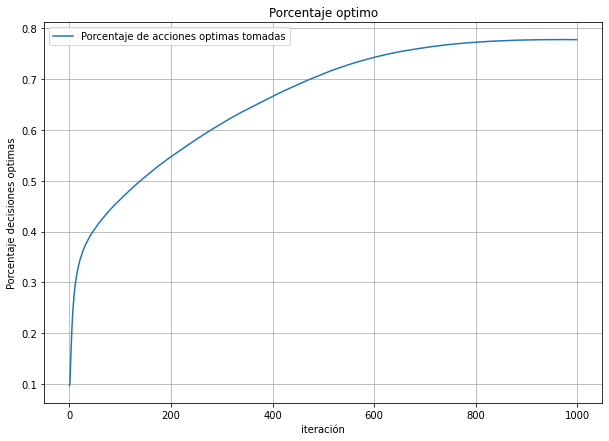


 Porcentaje de acciones óptimas tomadas con parametro ε =  0.05 
 


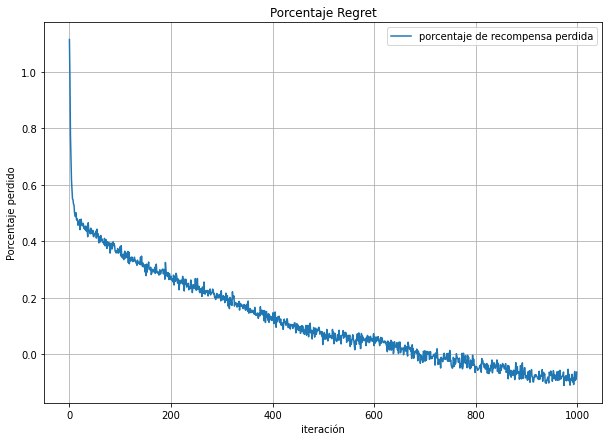


 Regret en porcentaje con parametro ε =  0.05 
 


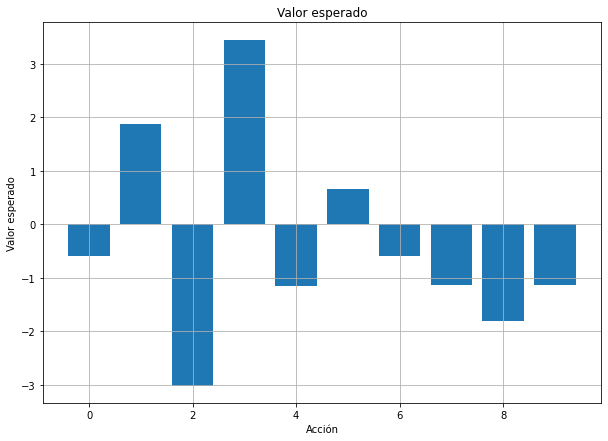


 Valor esperado de cada acción dado el parametro ε =  0.05 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
ve2,opt2,rm2,rea2=graficainador("ε-greedy",1000,0.05,2000)


3.   Con un valor de ε de 0.01 obtenemos las siguientes métricas:



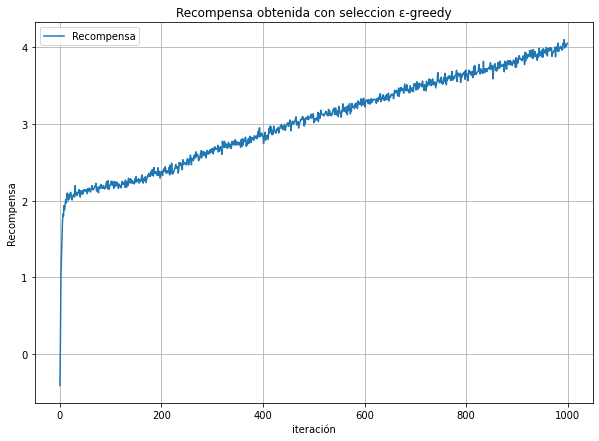


 Evolución de la recompensa promedio con parametro ε =  0.01 
 


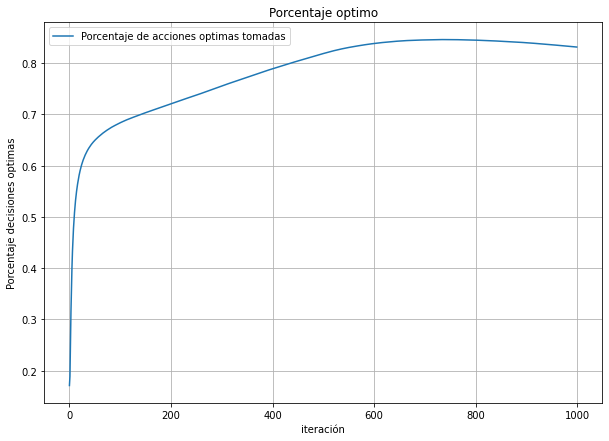


 Porcentaje de acciones óptimas tomadas con parametro ε =  0.01 
 


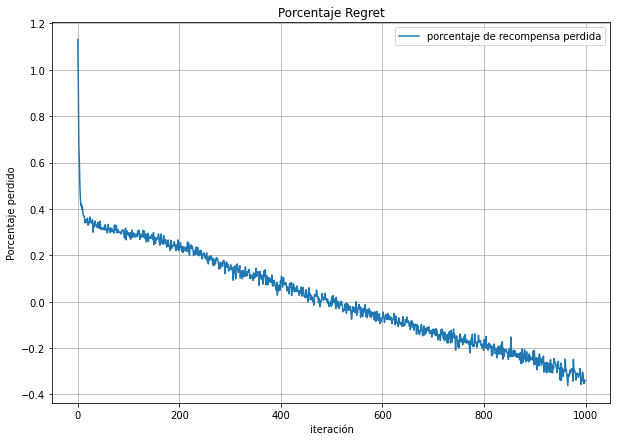


 Regret en porcentaje con parametro ε =  0.01 
 


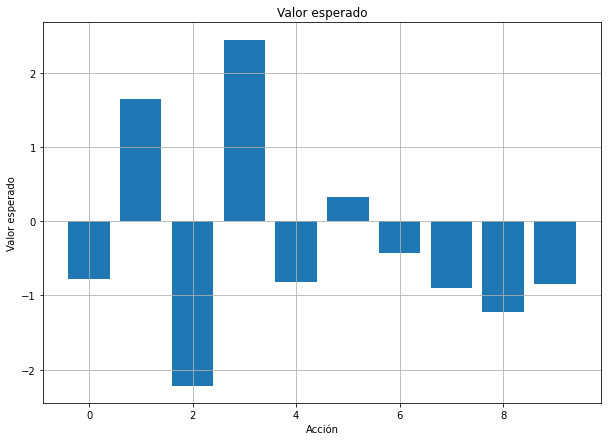


 Valor esperado de cada acción dado el parametro ε =  0.01 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
ve3,opt3,rm3,rea3=graficainador("ε-greedy",1000,0.01,2000)

Realizando una comparación entre los diferentes ε respecto a la métrica de evolución de la recompenza obtenida tenemos:

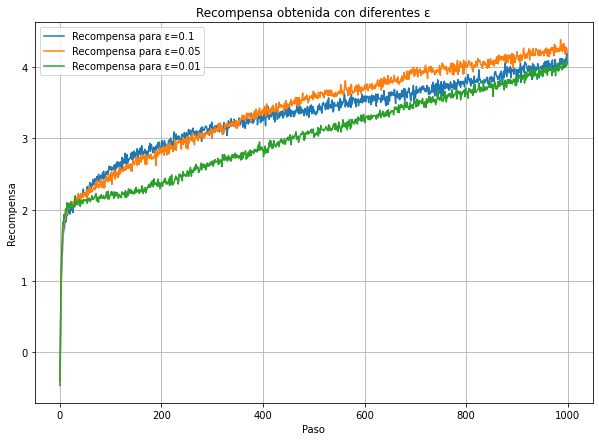

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(ve1)
plt.plot(ve2)
plt.plot(ve3)
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con diferentes ε')
plt.legend(['Recompensa para ε=0.1','Recompensa para ε=0.05','Recompensa para ε=0.01'])
plt.grid(True)
plt.show()

Teniendo asi que el parámetro ε con mejor recompenza es de ε = 0.05

## Método Upper Confidence Bound (UCB)

Con el método UCB se debe sintonizar el parámetro C, para este caso se probaron con los valores de 3, 2 y 1

1.   Con un valor de C de 3 obtenemos las siguientes métricas:

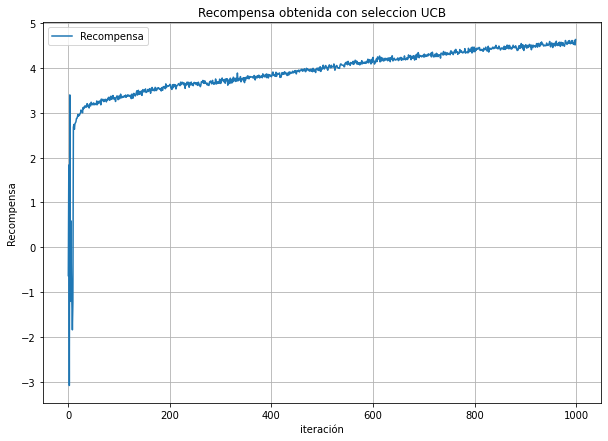


 Evolución de la recompensa promedio con parametro C =  3 
 


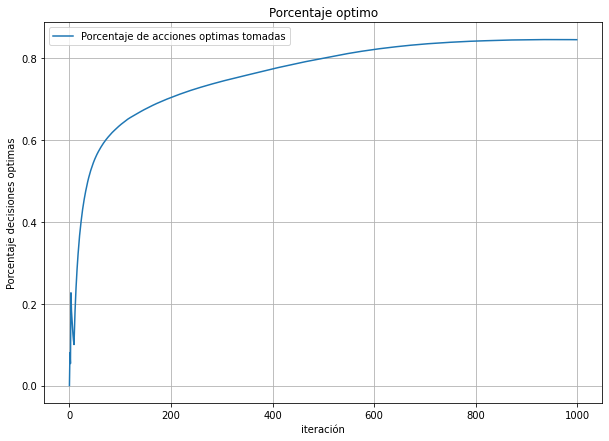


 Porcentaje de acciones óptimas tomadas con parametro C =  3 
 


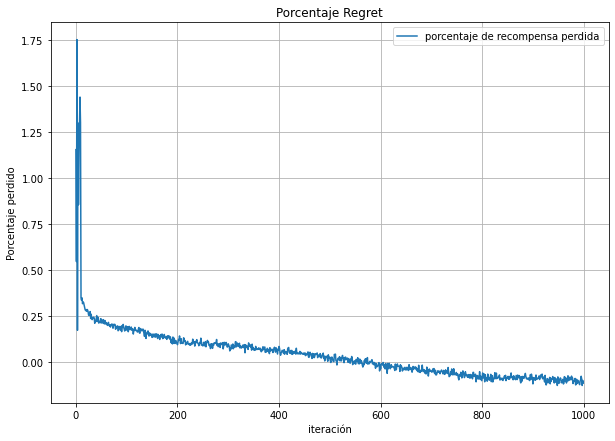


 Regret en porcentaje con parametro C =  3 
 


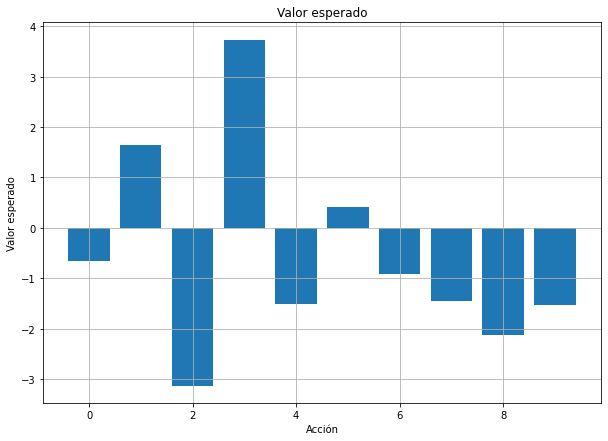


 Valor esperado de cada acción dado el parametro C =  3 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
veubc1,optubc1,rmubc1,reaucb1=graficainador("UCB",1000,3,2000)

2.   Con un valor de C de 2 obtenemos las siguientes métricas:

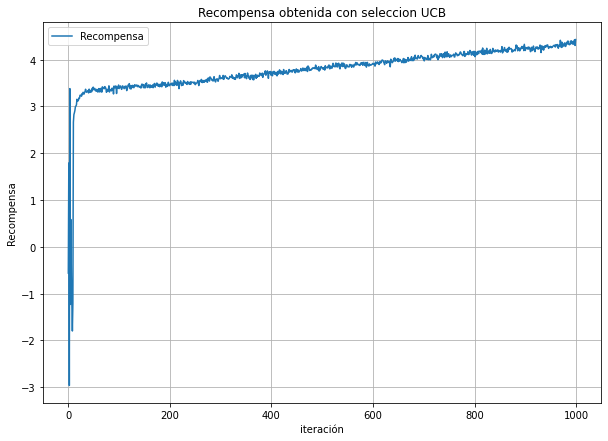


 Evolución de la recompensa promedio con parametro C =  2 
 


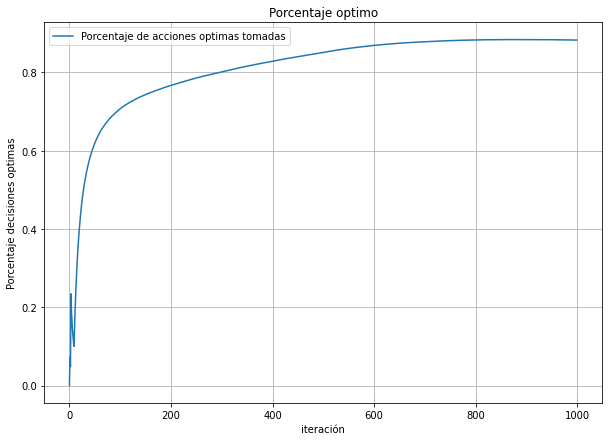


 Porcentaje de acciones óptimas tomadas con parametro C =  2 
 


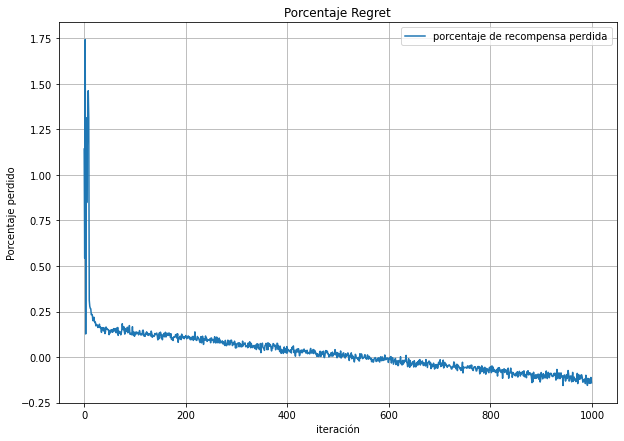


 Regret en porcentaje con parametro C =  2 
 


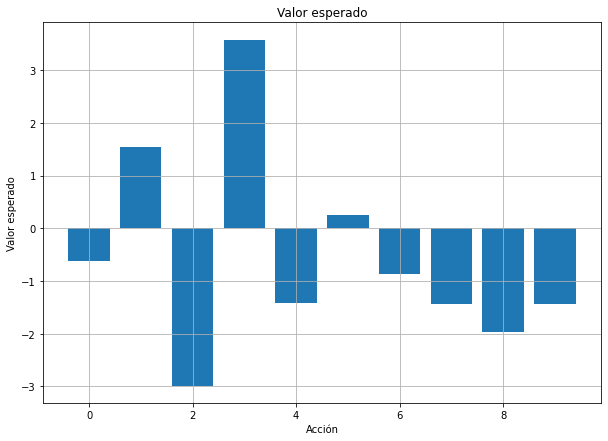


 Valor esperado de cada acción dado el parametro C =  2 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
veubc2,optubc2,rmubc2,reaucb2=graficainador("UCB",1000,2,2000)

3.   Con un valor de C de 1 obtenemos las siguientes métricas:

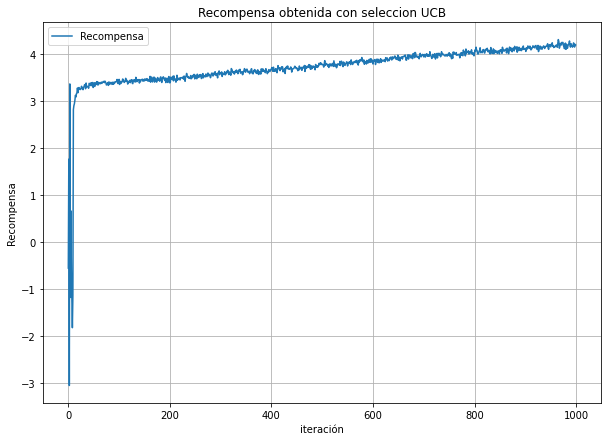


 Evolución de la recompensa promedio con parametro C =  1 
 


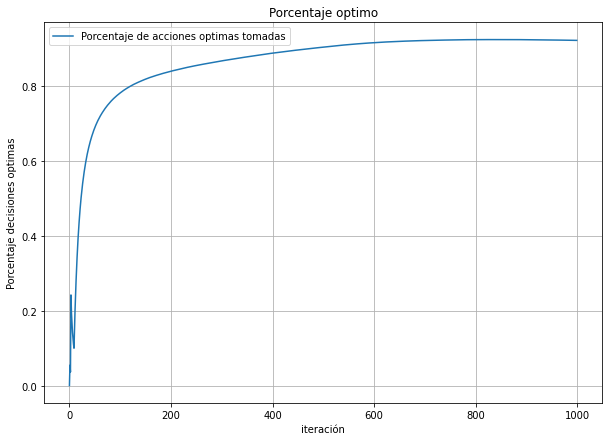


 Porcentaje de acciones óptimas tomadas con parametro C =  1 
 


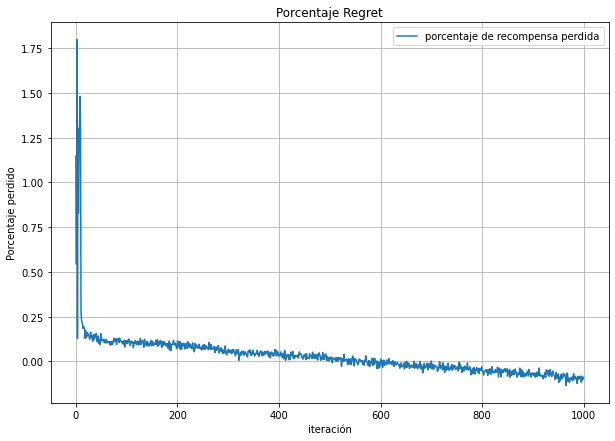


 Regret en porcentaje con parametro C =  1 
 


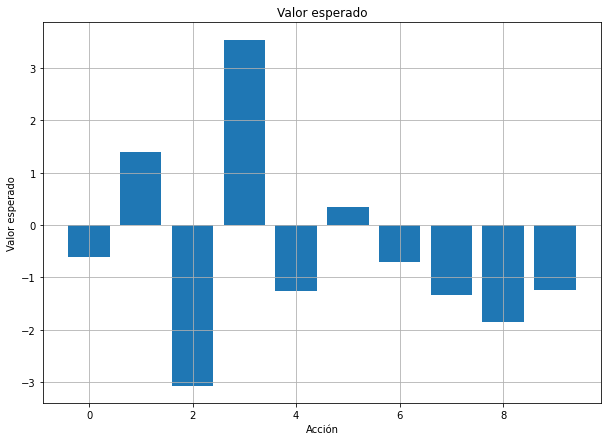


 Valor esperado de cada acción dado el parametro C =  1 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
veubc3,optubc3,rmubc3,reaucb3=graficainador("UCB",1000,1,2000)

Al realizar la comparación respecto a la evolución de la recompensa obtenida con los diferentes valores de C tenemos que:

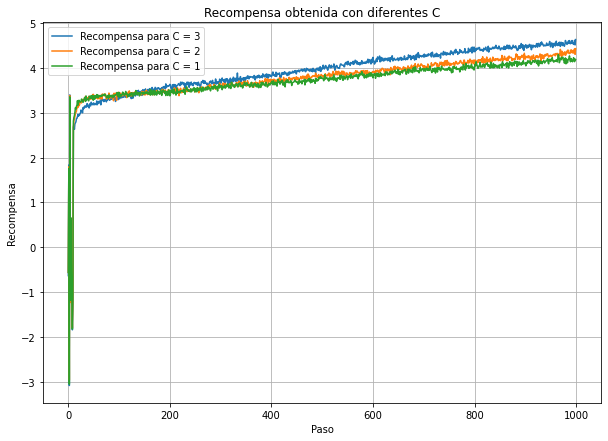

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(veubc1)
plt.plot(veubc2)
plt.plot(veubc3)
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con diferentes C')
plt.legend(['Recompensa para C = 3','Recompensa para C = 2','Recompensa para C = 1'])
plt.grid(True)
plt.show()

Por lo cual, se escoge como mejor valor de C = 2 al tener una mayor proyección de recompensa que las demás.

## Método Gradient Bandit

Con el método Gradient Bandit se debe sintonizar el parámetro α, para este caso se utilizaron valores de α de 0.1, 0.3 y 0.5

1.   Con un valor de α de 0.5 obtenemos las siguientes métricas:

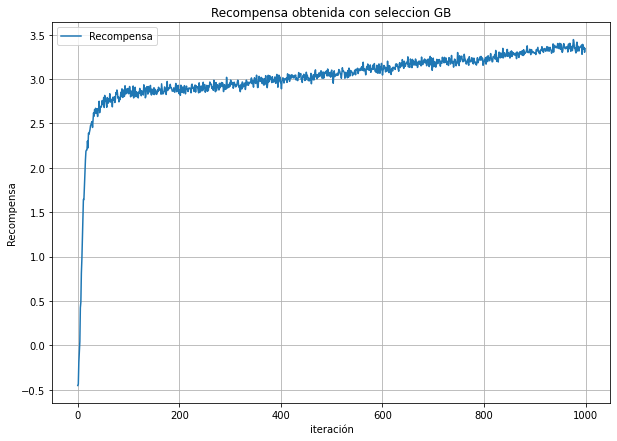


 Evolución de la recompensa promedio con parametro α =  0.5 
 


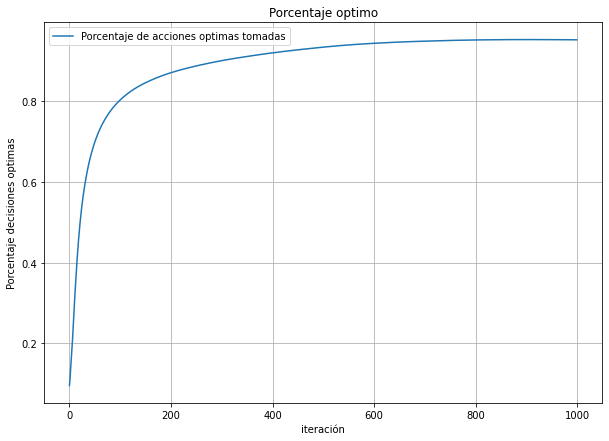


 Porcentaje de acciones óptimas tomadas con parametro α =  0.5 
 


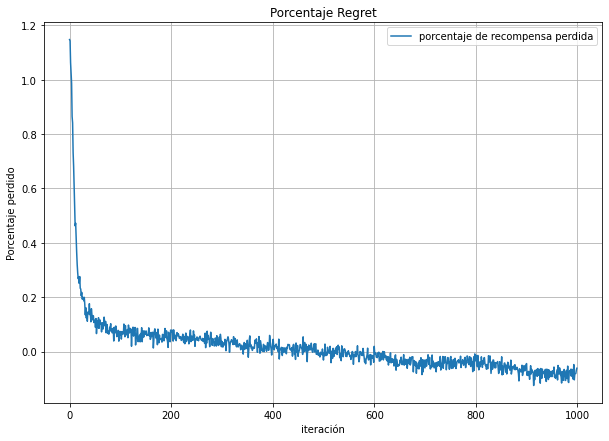


 Regret en porcentaje con parametro α =  0.5 
 


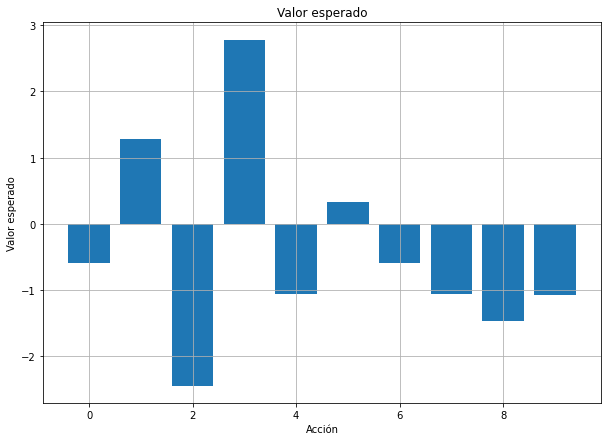


 Valor esperado de cada acción dado el parametro α =  0.5 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
vegb1,optgb1,rmgb1,regb1=graficainador("GB",1000,0.5,2000)

2.   Con un valor de α de 0.3 obtenemos las siguientes métricas:

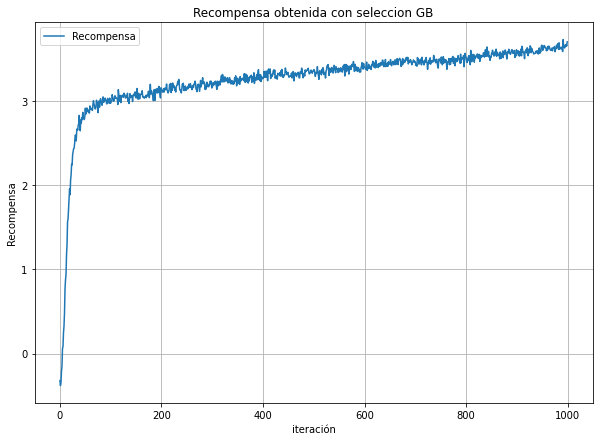


 Evolución de la recompensa promedio con parametro α =  0.3 
 


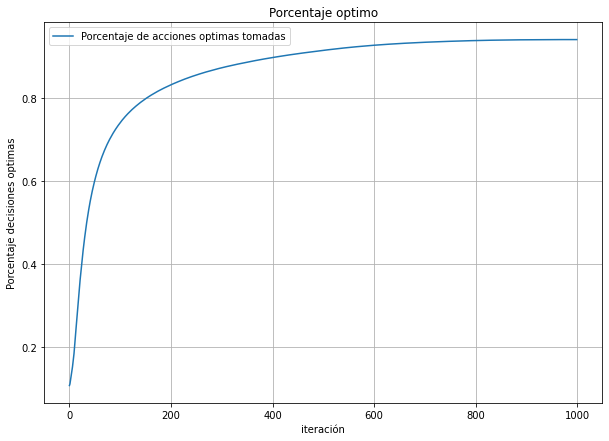


 Porcentaje de acciones óptimas tomadas con parametro α =  0.3 
 


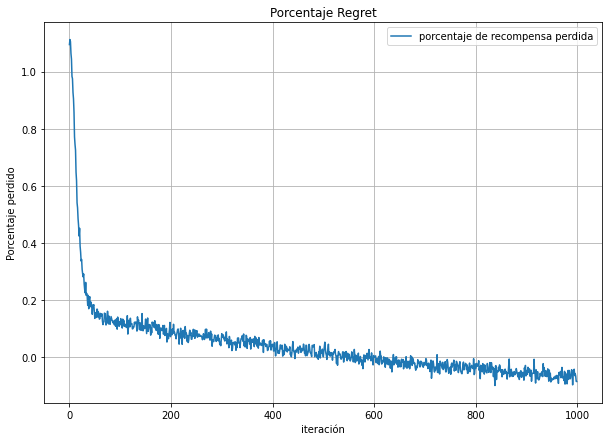


 Regret en porcentaje con parametro α =  0.3 
 


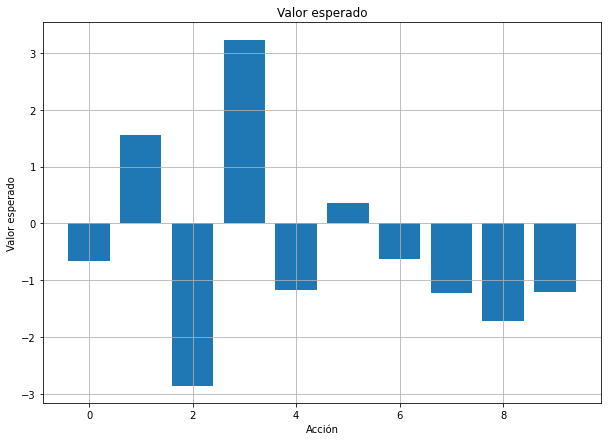


 Valor esperado de cada acción dado el parametro α =  0.3 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
vegb2,optgb2,rmgb2,regb2=graficainador("GB",1000,0.3,2000)

3.   Con un valor de α de 0.1 obtenemos las siguientes métricas:

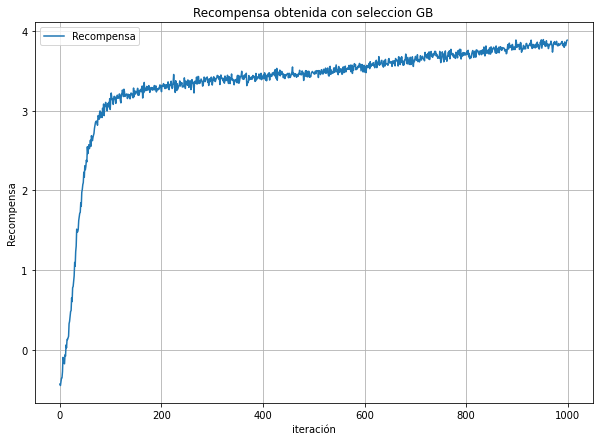


 Evolución de la recompensa promedio con parametro α =  0.1 
 


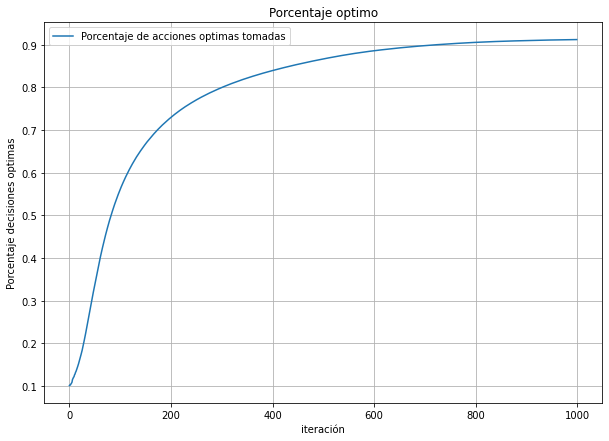


 Porcentaje de acciones óptimas tomadas con parametro α =  0.1 
 


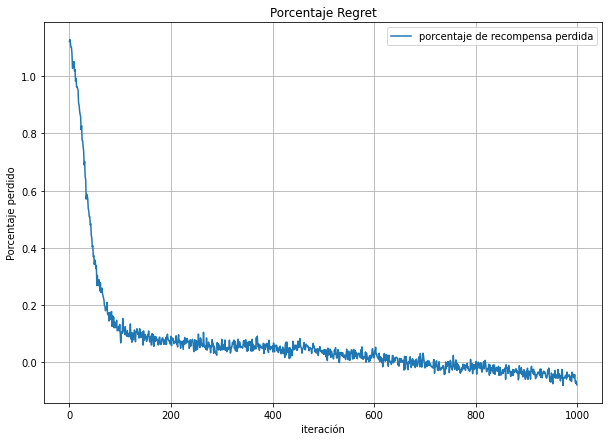


 Regret en porcentaje con parametro α =  0.1 
 


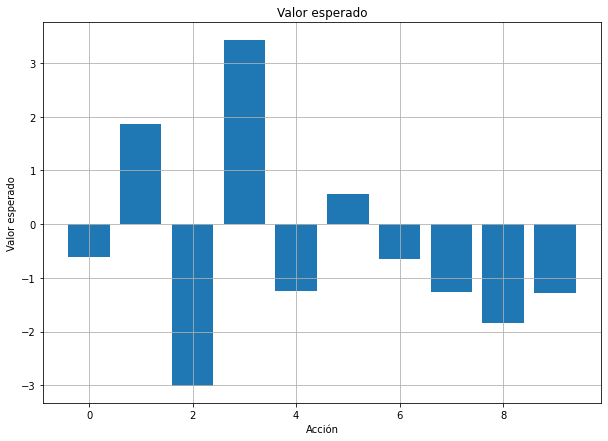


 Valor esperado de cada acción dado el parametro α =  0.1 
 

  
 la acción encontrada como optima fue: 3


In [ ]:
vegb3,optgb3,rmgb3,regb3=graficainador("GB",1000,0.1,2000)

Realizando una comparación entre los diferentes α respecto a la métrica de evolución de la recompenza obtenida tenemos:

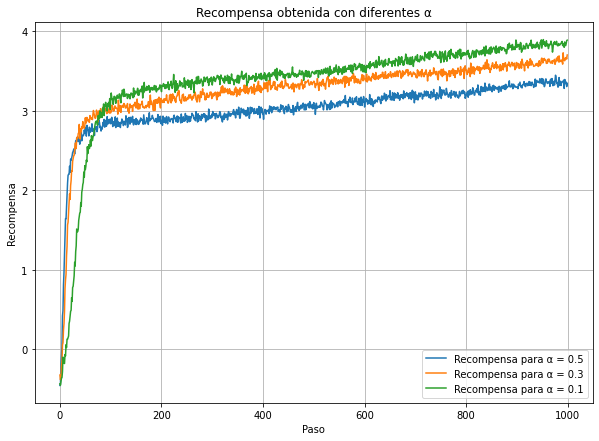

In [ ]:
fig=plt.figure(figsize=(10, 7))
plt.plot(vegb1)
plt.plot(vegb2)
plt.plot(vegb3)
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con diferentes α')
plt.legend(['Recompensa para α = 0.5','Recompensa para α = 0.3','Recompensa para α = 0.1'])
plt.grid(True)
plt.show()

Teniendo así como mejor valor de α = 0.1


## Métricas de evaluación: Comparación de 3 métodos para Escenario 3

In [ ]:
# Hiper-parámetros óptimos de cada método para el escenario 3
eps_3=0.05
v0_egreedy_3=5
v0_3=0
c_3=2
alpha_3=0.1

### Recompensa Promedio Ponderada

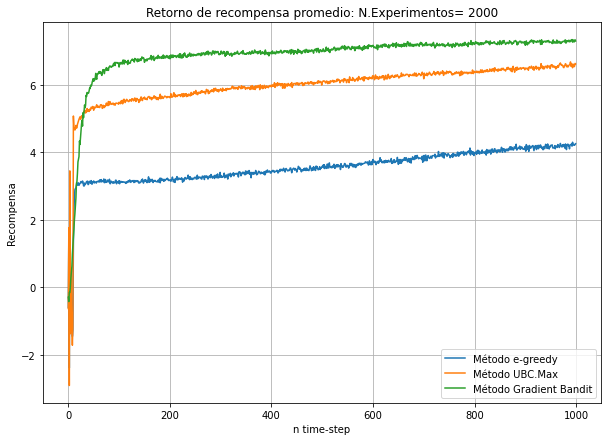

In [ ]:
# Resultados: Recompensa promedio ponderada 
N=2000 # numero de experimentos
n=1000 # time-step/iteraciones
actions = np.arange(0,10,1) # bandits/acciones
env=3 # ambiente/escenario

retornos_recompensa_prom_egreedy,retornos_recompensa_prom_ucbmax,retornos_recompensa_prom_gradient= recompensa_promedio_ponderada (N,n,actions,env,eps_3,v0_egreedy_3,v0_3,c_3,alpha_3)


### Porcentaje de Acción Óptima Ponderada

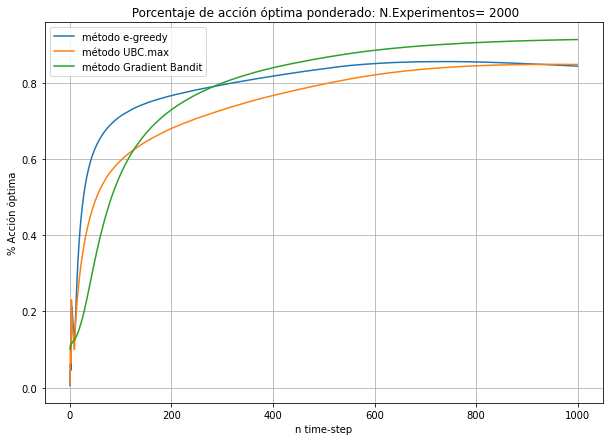

In [ ]:
# Resultados: % Acción Óptima Ponderada
N=2000 # numero de experimentos
n=1000 # time-step/iteraciones
actions = np.arange(0,10,1) # bandits/acciones
env=3 # ambiente/escenario

porcentaje_accion_opt_ponderado_greedy,porcentaje_accion_opt_ponderado_ubcmax,porcentaje_accion_opt_ponderado_gradient= porcentaje_accion_opt_ponderado (N,n,actions,env,eps_3,v0_egreedy_3,v0_3,c_3,alpha_3)

### Regret Ponderado

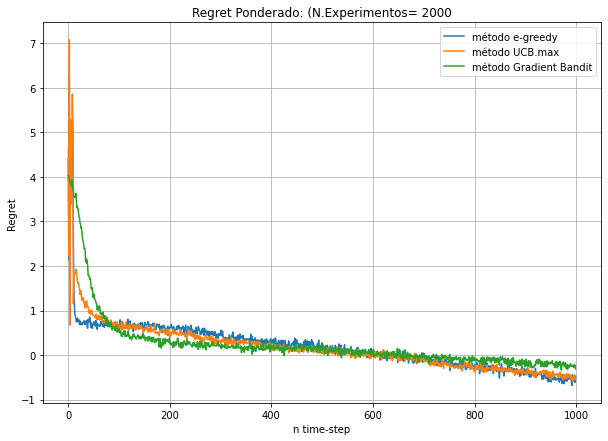

In [ ]:
# Resultados: Regret Ponderado
N=2000 # numero de experimentos
n=1000 # time-step/iteraciones
actions = np.arange(0,10,1) # bandits/acciones
env=3 # ambiente/escenario

regret_ponderado_egreedy,regret_ponderado_ucbmax,regret_ponderado_gradient = regret_ponderado (N,n,actions,env,eps_3,v0_egreedy_3,v0_3,c_3,alpha_3)

# Análisis de Resultados y Discusión 

A partir de los resultados comparativos del escenario 1 se puede concluir que el mejor algoritmo que maximiza la recompensa promedio es el método UBC.max (Selección con intervalo de confianza) ya que la recompensa promedio para 1000 iteraciones es de 3.35, sin embargo las recompensas promedio obtenida mediante los otros algoritmos se acerca este valor; entre 0-60 iteraciones iniciales el método e-greedy obtiene una recompensa promedio mayor. 

Del mismo modo el porcentaje de acciones óptimas obtenidas con el algoritmo UBC.max supera los 0.9 (90%) mientras que con el método e-greedy selecciona un menor porcentaje significativo de veces la acción óptima para 1000 iteraciones con un porcentaje de 0.87 (87%).

Los resultados del regret para los 3 métodos tiende a 0 y es dificil determinar gráficamente cuál tiene menor regret. Entonces se determina que el escenario 1 es estacionario de alta varianza por la respuesta de las recompensas obtenidas, tanto para la recompensa promedio como para el regret, en el que se observa un comportamiento disruptivo y variante en las recompensas, debido a la alta varianza de las distrubuciones de los n-bandits.




A partir de los resultados comparativos del escenario 2 se puede concluir que el mejor algoritmo que maximiza la recompensa promedio es el método UBC.max (Selección con intervalo de confianza) ya que la recompensa promedio para 1000 iteraciones es de 3.4 aproximadamente, sin embargo las recompensas promedio obtenida mediante los otros algoritmos se acerca este valor; sin embargo para todos los instantes de tiempo $n$ el método de UBC.max siempre obtiene una mayor recompensa promedio en relación con otros métodos. 


Más aún en los resultados del porcentaje de acciones óptimas obtenidas con el algoritmo UBC.max supera los 0.93 (93%) de acciones seleccionadas como óptimas,  mientras que con los método e-greedy y Gradient Bandit selecciona un menor porcentaje significativo de veces la acción óptima para 1000 iteraciones con un porcentaje que tiende a 0.86 (86%), mucho menor que el desempeño de UBC.max.

Los resultados del regret para los 3 métodos tiende a 0 y es dificil determinar gráficamente cuál tiene menor regret, sin embargo para 1000 iteraciones el método e-greedy es el menos favoraible porque el regret obtenido es mayor y está por encima de UBC.max y Gradient Bandit. Por otro lado, entre las iteraciones iniciales 0-120 del algoritmo, el regret obtenido por el método Gradient es entre 1 y 4 veces mayor que los métodos e-greedy y UBC.max, por lo que las acciones escogidas en las primeras iteraciones del algoritmo Gradient Bandit para el escenario 2 le generan mayores pérdidas en recompensa obtenida. 

Por otro lado se determina que el escenario 2 es estacionario de baja varianza por la respuesta de las recompensas obtenidas, tanto para la recompensa promedio como para el regret, en el que se observa un comportamiento suave y uniforme en las recompensas obtenidas, debido a la baja varianza de las distrubuciones de los n-bandits.

Finalmente a partir de los resultados comparativos del escenario 3 se puede concluir que el mejor algoritmo que maximiza la recompensa promedio es el método Gradient Bandit ya que la recompensa promedio obtenida para 1000 iteraciones es de 6.7  aproximadamente, 
mientras que las recompensas promedio obtenidas para los algoritmos UBC.max y e-greedy son de aproximadamente 6.2 y 4.1 respectivamente lo cual es significativamente menor.

Más aún en los resultados del porcentaje de acciones óptimas obtenidas con el algoritmo Gradient Bandit supera los 0.90 (90%) de acciones seleccionadas como óptimas,  mientras que con los métodos e-greedy y UBC.Max selecciona un menor porcentaje significativo de veces la acción óptima para 1000 iteraciones con un porcentaje que tiende a 0.82 (82%), mucho menor que el desempeño de Gradient Bandit, a pensar de que para las primeras 250 iteraciones el algoritmo e-greedy selecciona un mayor porcentaje de acciones óptimas en relación con el algortimo Gradient Bandit.

Los resultados del regret para los 3 métodos es disruptivo e inconcluso, con la particularidad que para después de 500 iteraciones el valor del regret para los métodos es negativo $regret<0$, lo que significa que la la naturaleza cambiante del escenario, en la que las distribuciones (media y varianza) de los bandits cambia, entonces determina que la acción óptima cambia a lo largo del tiempo, obteniendo así un regret negativo

A partir de los resultados anteriores de regret principalmente, así se determina que el escenario 3 es no estacionario ya que el desempeño de los métodos clásicos de e-greedy que tiene en cuenta una acción óptima predeterminada a partir del vector de rectorno tiene un desempeño deficiente, mientras que el algoritmo gradient bandit que opera mediante funciones de preferencia relativa entre las últimas recompensas vistas y a partir de ahí actualiza el vector de probabilidades "prior", entonces es más eficiente en modelos no estacionarios.



## Conclusiones



*   La acción óptima para los escenarios 1,2 y 3 respectivamente es la acción 3, a partir de los resultados del la recompensa esperada mostrada en los histogramas que cuantifican la media (valor esperado) de la distribución de cada uno de los bandits, para cada uno de los escenarios. Entonces la acción óptima es aquella cuyo valor esperado estimado (de recompensa) sea mayor. Para todos los escenarios fue el 3.
*   Para escenarios estacionarios, donde la distribución (media, varianza) de los bandits no cambia, para los escenarios con las distribuciones dadas el método UBC.max (Selección con intervalo de confianza) tiende a maximizar tanto la recompensa promedio obtenida en función de las iteraciones, mientras que a su vez selecciona el mayor número de acciones óptimas a lo largo del tiempo


*   El método e-greedy puede aplicarse para asegurar una convergencia rápida en escenarios de baja varianza (escenario 2) mientras que a largo plazo o mayor número de iteraciones, los algoritmos e-UBC.max y Gradient Bandit tienden a tener un desempeño mejor, más estable y robusto
*   Para escenarios no estacionarios, le método e-greedy tiene un desempeño deficiente en relación con los otros 2 métodos, pues no distingue entre recompensas de iteraciones pasadas y actuales, mientras que el método Gradient Bandit actualiza la función de preferencia de manera relativa a las recompensas obtenidas de acciones presentes. 





# Referencias

[1] R. S. Sutton and A. G. Barto, Reinforcement Learning: An Introduction. Cambridge,
MA, USA: A Bradford Book, 2018.